In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataset.xlsx')

In [3]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

# 1. exploration des donnees
**objectif**: 
**-comprendre du mieux possible nos donnees**
**-developper une premiere strategie de modelisation**

# checklist de base

## analyse de forme
**-variable target**:[SARS-Cov-2 exam result]
**-lignes et colonnes**:(5644, 111)
**-types de variables**:qualitative: 37, quantitative: 74
-**analyse des valeurs manquantes**: beacoup de Nan
2 groupes de variables:(76% des test viral, 89% taux sanguins)

# analyse de fond
-**visualisation de la target**:
 -10% de positifs
-**signification des variables**:
-variables continues standardisees
-age quantile:difficile d'interpreter ce graphique, clairement ces donnees ont ete traitees.
-variable qualitative: binaire(0, 1), viral, Rhinovirus qui sembkle tres eleve

-**relation variables/target**: 
-les taux de monocytes, platelets, leukocytes semblent lies au covid-19-> hypotheses a tester
-target/age: les individus de faible age sont peu contamines 
-target/ viral: les doubles maladies sont tres rares. 

# analyse plus detaillee
**relation variable/ variable**
**- blood_data / blood_data:** certaines variables sont tres correlees : +0.9(a surveiller plus tard)
**- blood / age** : tres faible correlation entre age et taux sanguins
**- viral/viral**: influenza rapid test donne de mauvais resultats, il faudra peut etre la laisser tomber 
**-relation maladie / blood data**: les taux sanguins entre malades et covid-19 sont differents
**relation hospitalisation/ est malade**:

**NaN analyse** : viral: 1350(92/8), blood:600(87/13), both:90

### hypotheses nulles(H0):
**les individus atteints du covid-19 ont des taux de leucocytes,monocytes et platelets significativement differents.**
H0 = les taux moyens sont egaux chez les individus positifs et negatifs.


In [4]:
df = data.copy()

In [5]:
df.shape

(5644, 111)

In [6]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

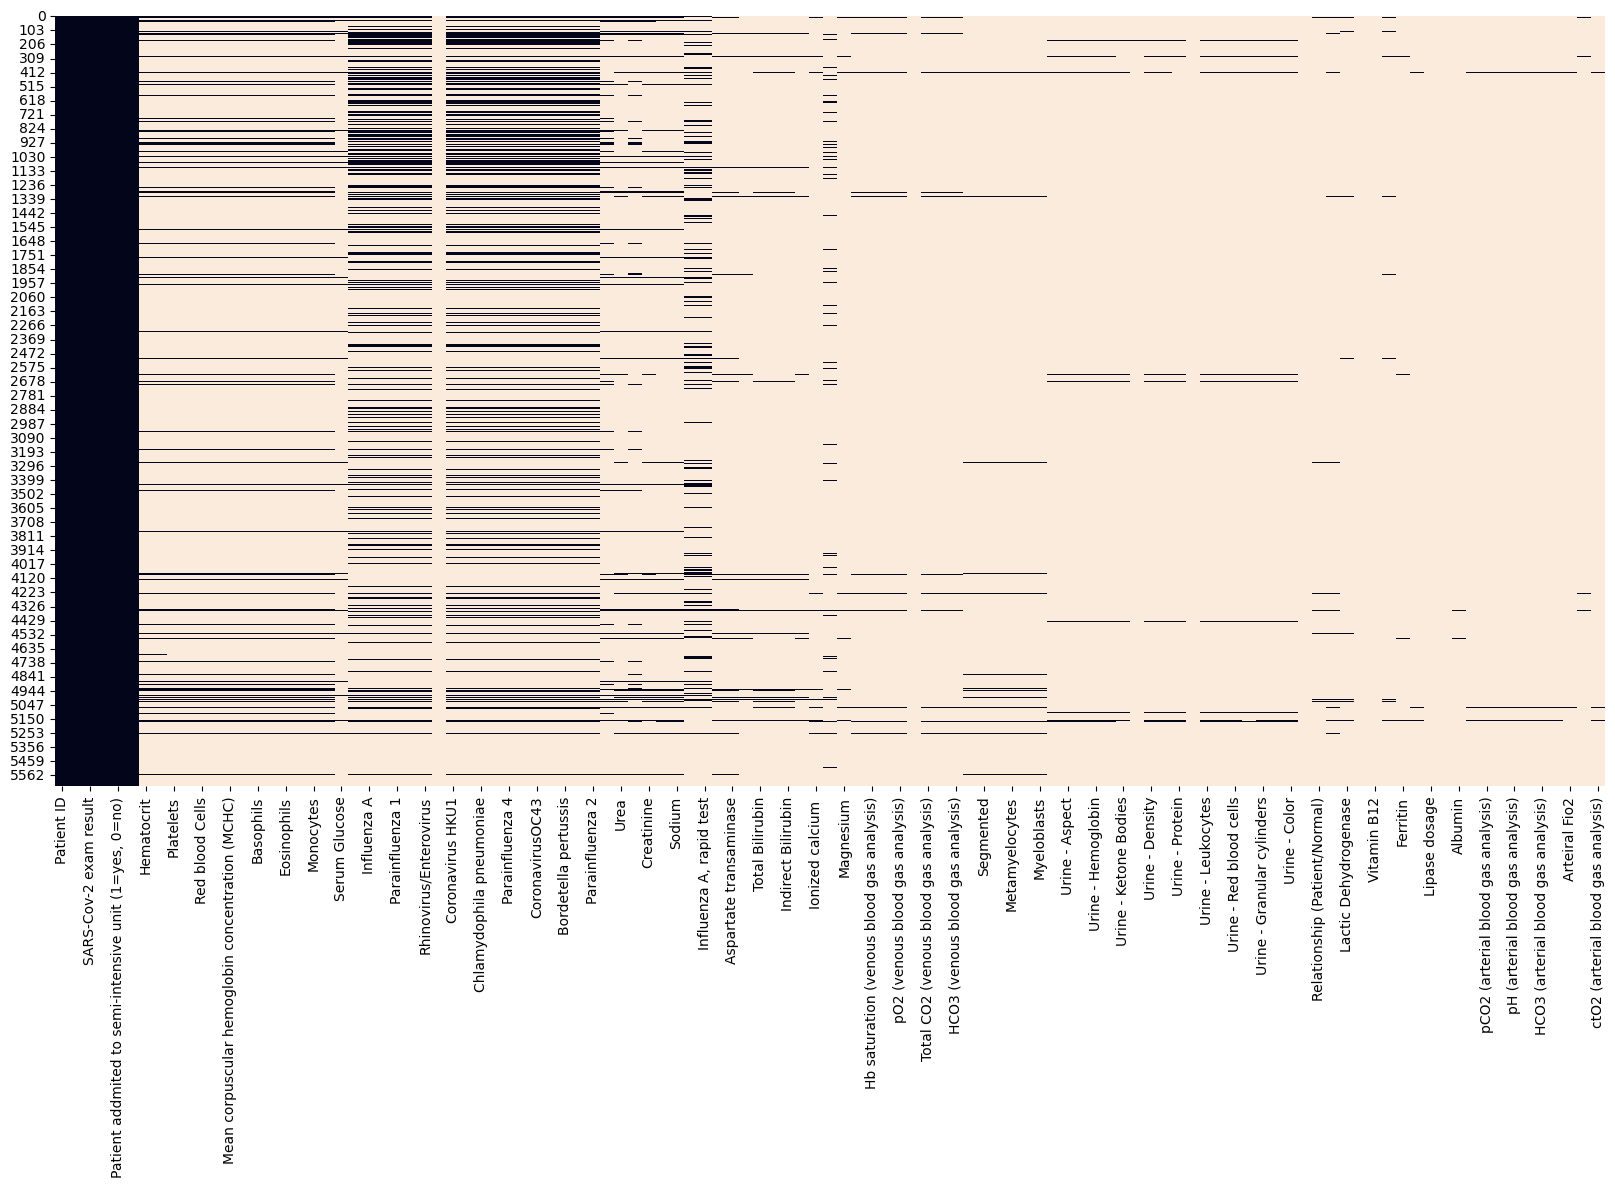

In [7]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.isna(), cbar = False)

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending= True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

# analyse de fond
### 1. visualisation initiale-elimination des colonnes inutiles

In [9]:
df = df[df.columns[df.isna().sum()/df.shape[0]< 0.9]]

<Axes: >

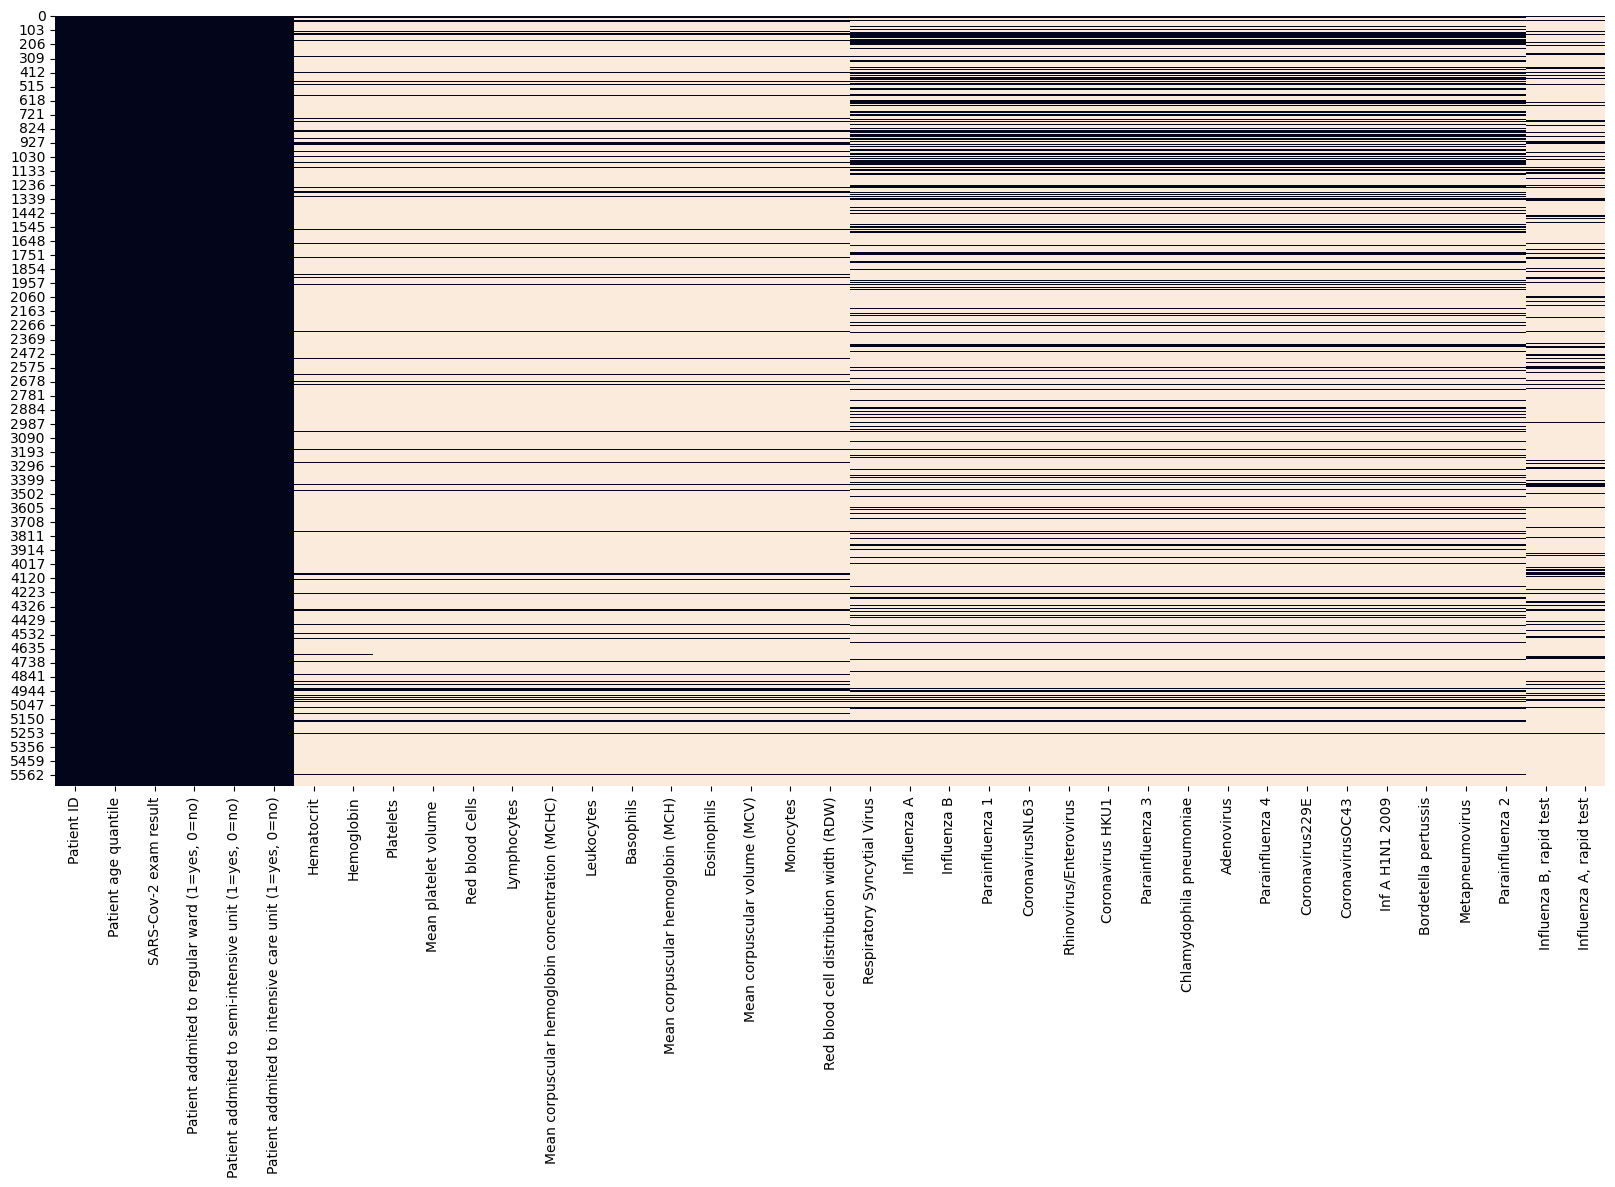

In [10]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.isna(), cbar = False)

In [11]:
df = df.drop('Patient ID', axis  = 1)

In [12]:
##### visualisation de la target
df['SARS-Cov-2 exam result'].value_counts(normalize = True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

# histogramme de variables continues

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


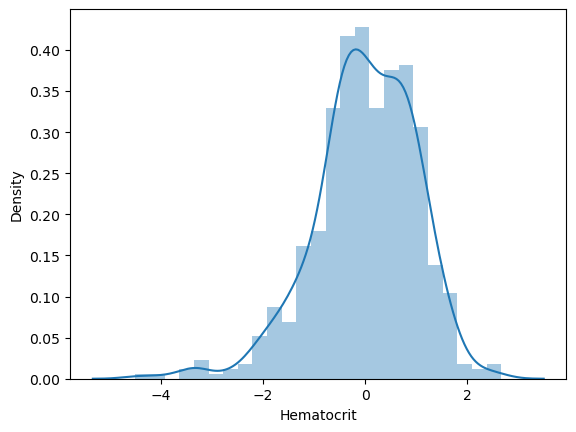

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


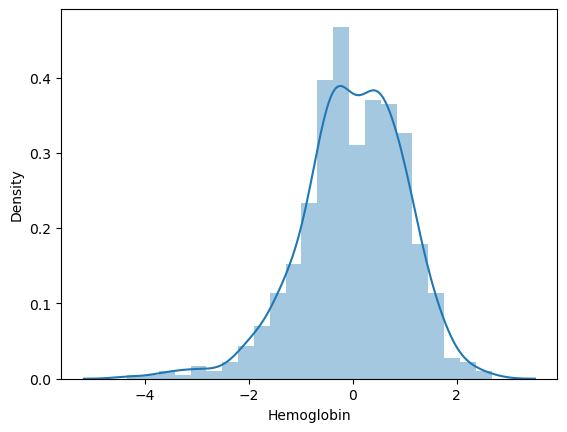

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


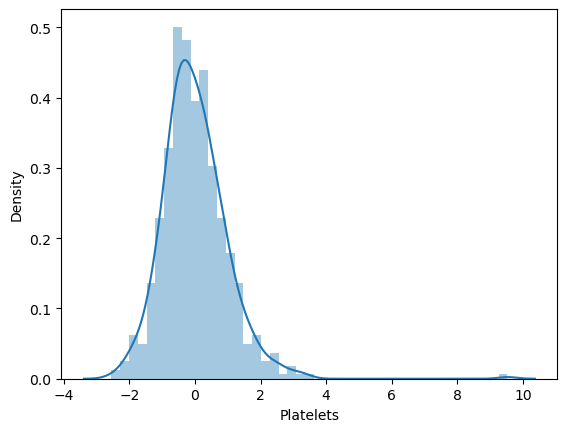

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


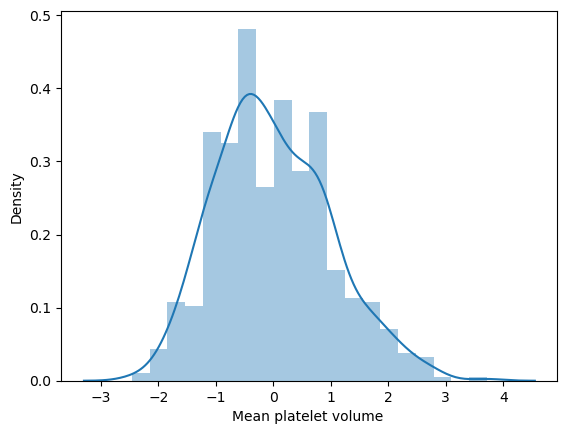

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


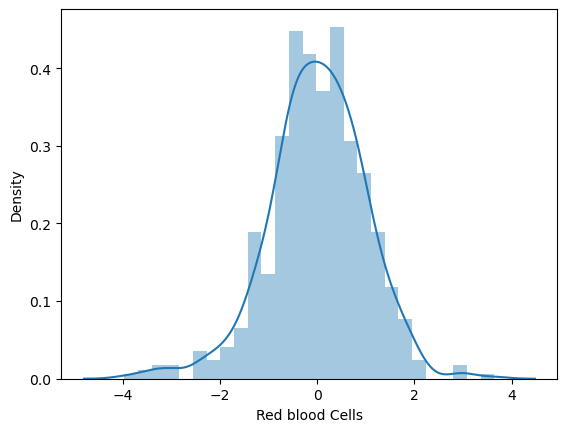

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


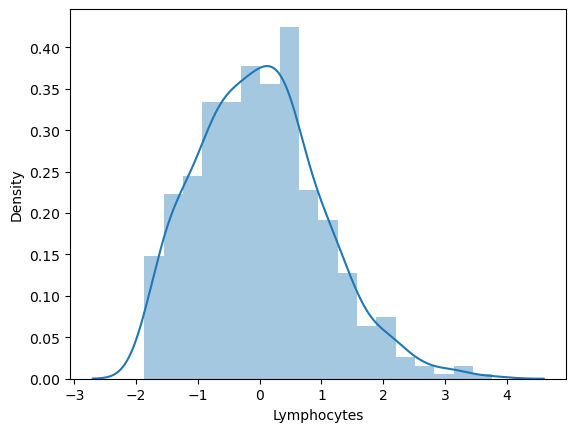

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


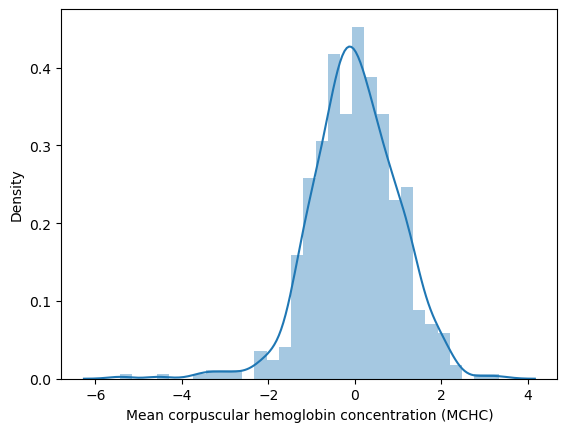

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


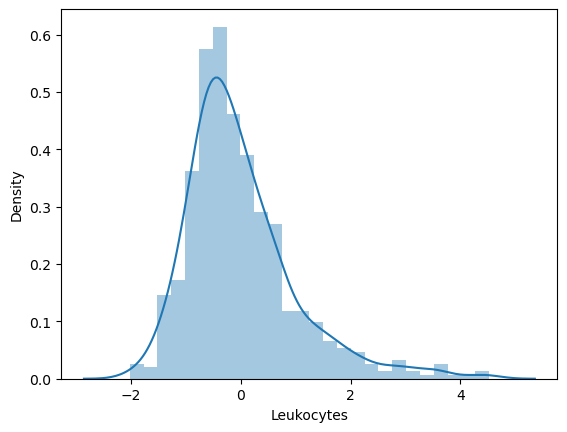

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


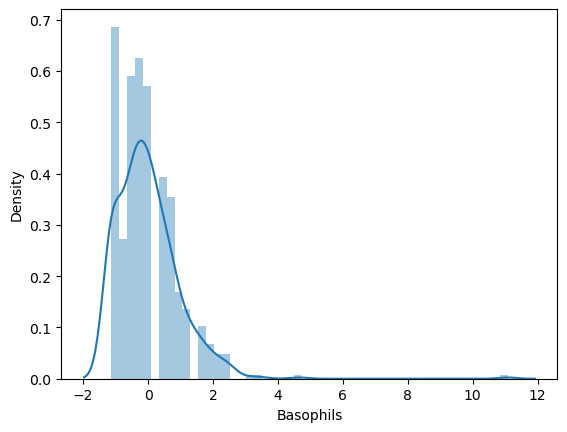

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


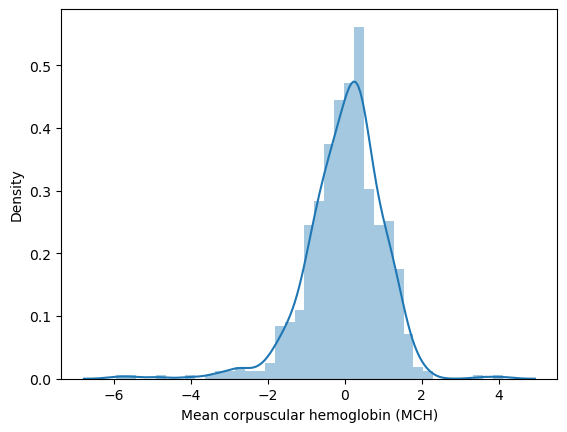

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


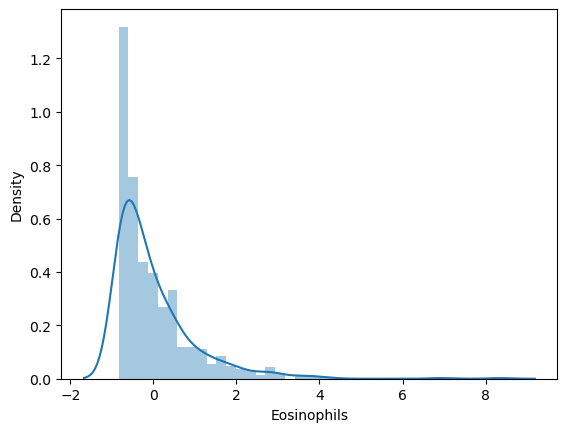

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


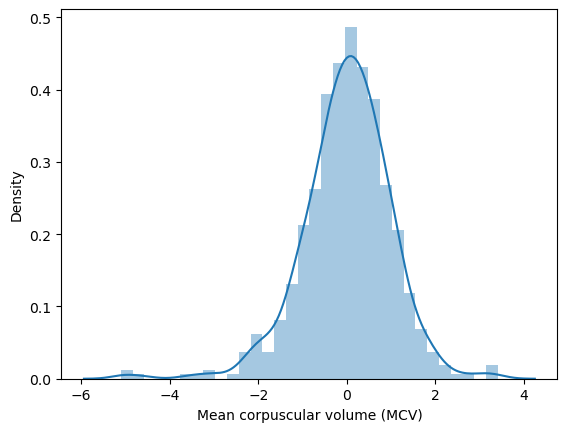

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


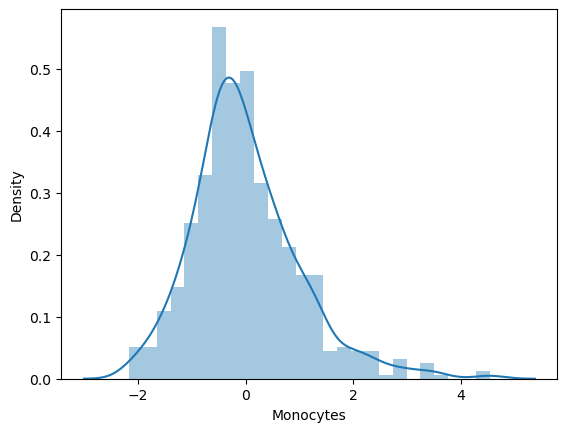

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3993577655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


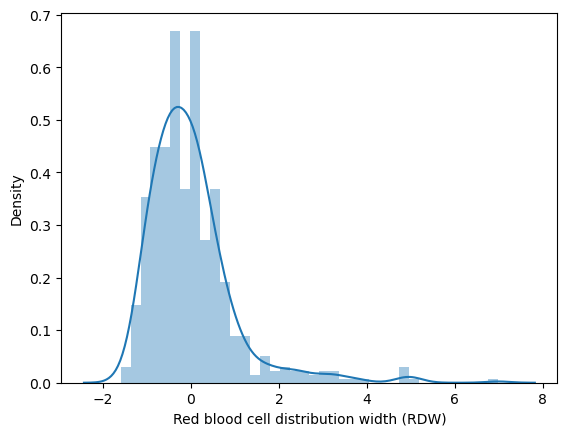

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])
    plt.show()

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\419730654.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Patient age quantile'])


<Axes: xlabel='Patient age quantile', ylabel='Density'>

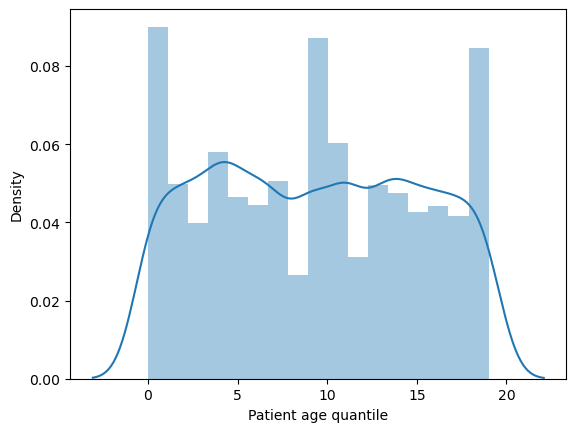

In [14]:
 sns.distplot(df['Patient age quantile'])

# variables qualitatives

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col:-<20},  {df[col].unique()}')

SARS-Cov-2 exam result,  ['negative' 'positive']
Respiratory Syncytial Virus,  [nan 'not_detected' 'detected']
Influenza A---------,  [nan 'not_detected' 'detected']
Influenza B---------,  [nan 'not_detected' 'detected']
Parainfluenza 1-----,  [nan 'not_detected' 'detected']
CoronavirusNL63-----,  [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus,  [nan 'detected' 'not_detected']
Coronavirus HKU1----,  [nan 'not_detected' 'detected']
Parainfluenza 3-----,  [nan 'not_detected' 'detected']
Chlamydophila pneumoniae,  [nan 'not_detected' 'detected']
Adenovirus----------,  [nan 'not_detected' 'detected']
Parainfluenza 4-----,  [nan 'not_detected' 'detected']
Coronavirus229E-----,  [nan 'not_detected' 'detected']
CoronavirusOC43-----,  [nan 'not_detected' 'detected']
Inf A H1N1 2009-----,  [nan 'not_detected' 'detected']
Bordetella pertussis,  [nan 'not_detected' 'detected']
Metapneumovirus-----,  [nan 'not_detected' 'detected']
Parainfluenza 2-----,  [nan 'not_detected']
Influenza B, r

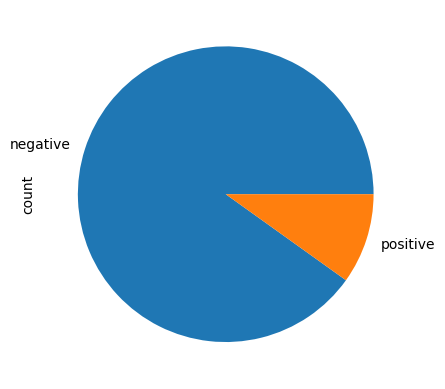

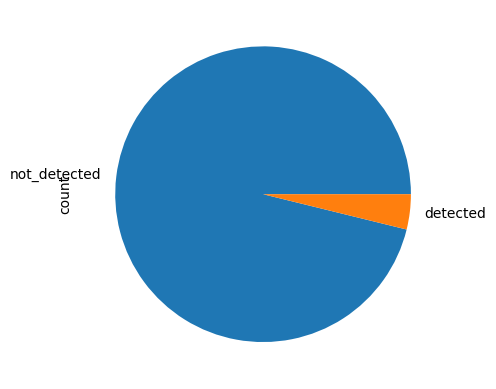

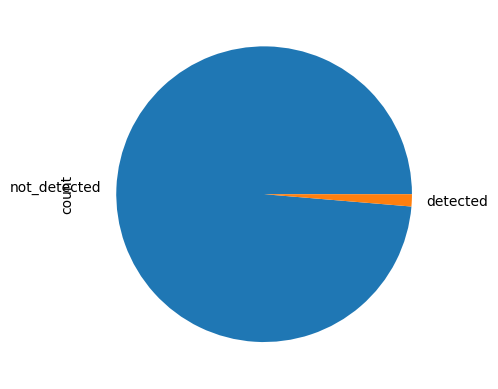

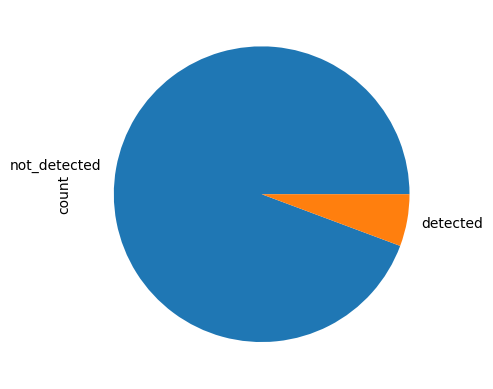

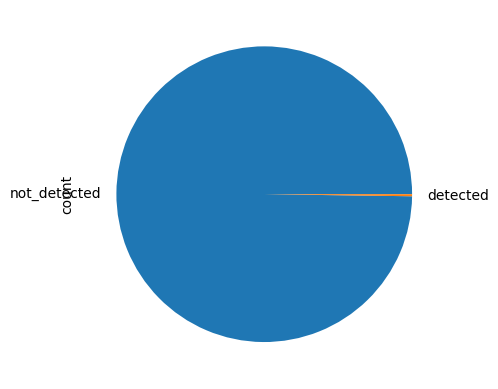

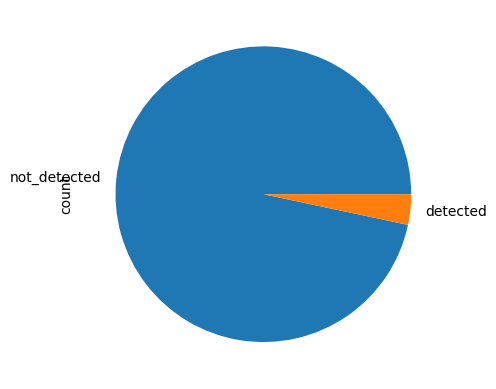

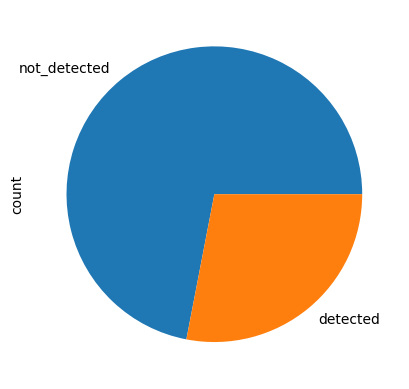

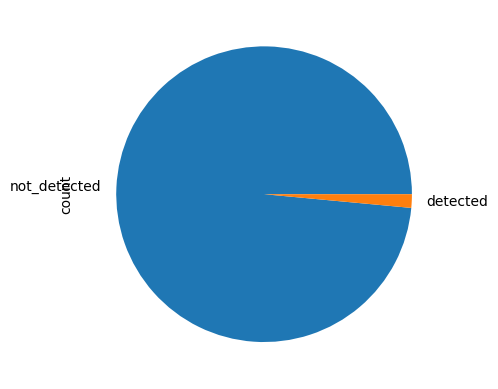

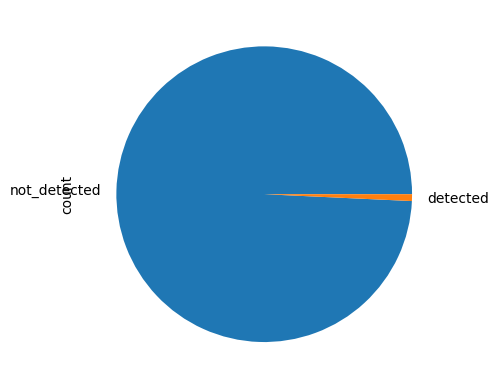

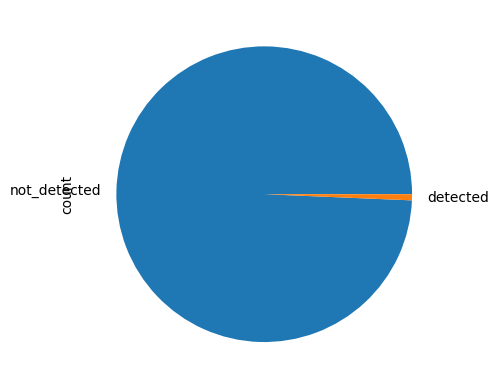

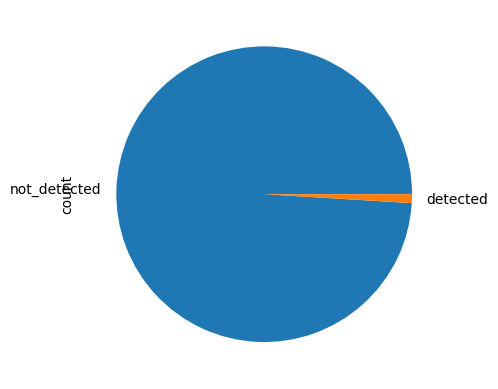

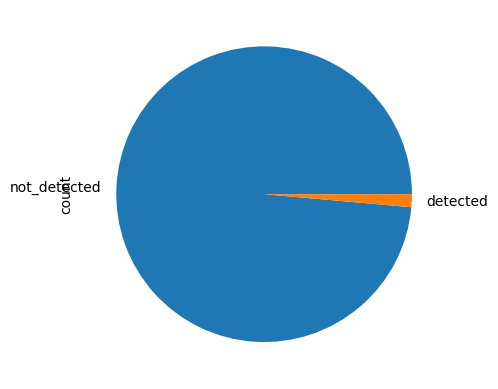

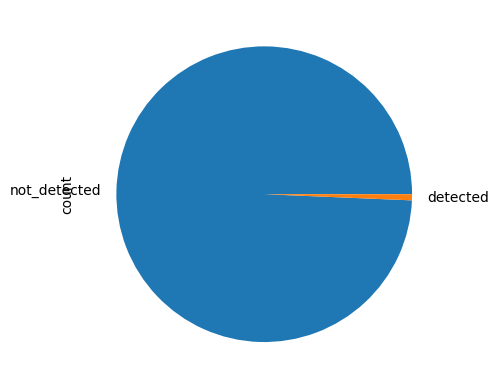

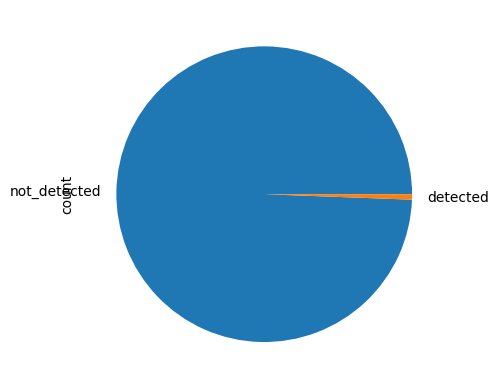

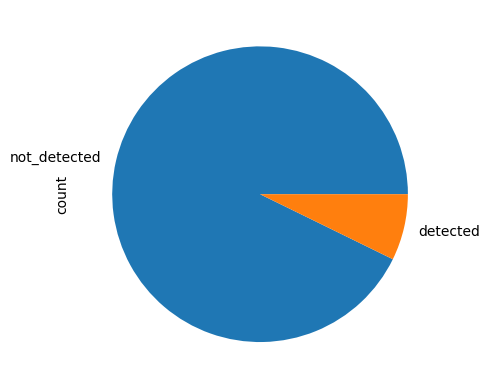

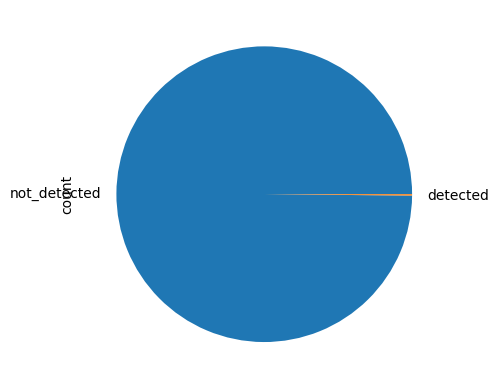

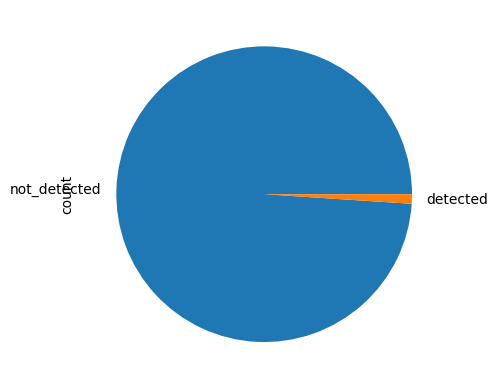

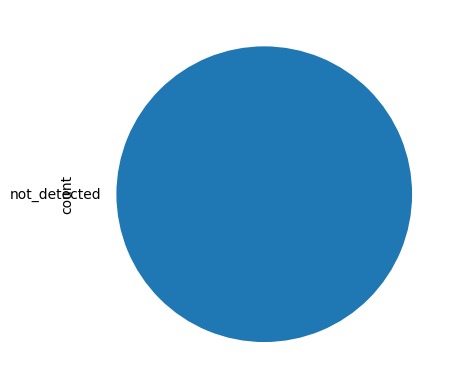

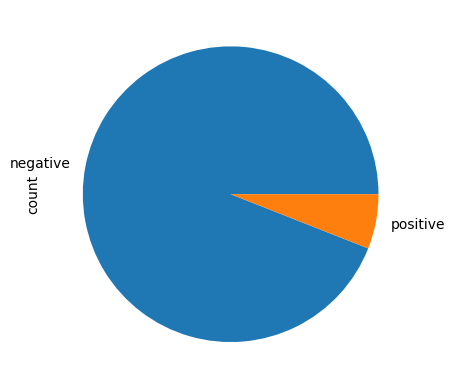

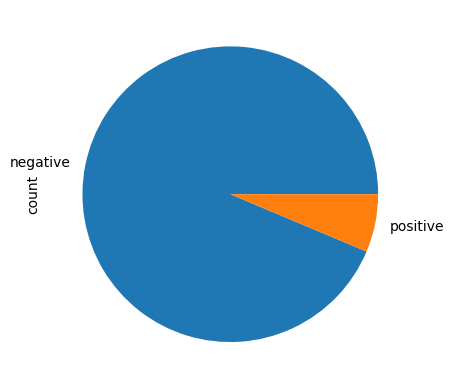

In [16]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.show()

# relation target/variables
## creation des sous-ensembles positifs et negatifs

In [17]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
positive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
67             NaN              NaN              NaN

In [18]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

# creation des ensembles blood et viral

In [19]:
missing_rate = df.isna().sum()/df.shape[0]

In [20]:
blood_columns = df.columns[(missing_rate< 0.9) & (missing_rate> 0.88)]

In [21]:
viral_columns = df.columns[(missing_rate< 0.88) & (missing_rate> 0.75)]

# target /blood

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

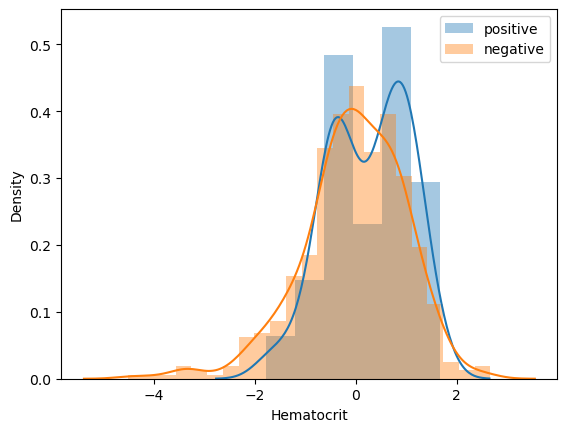

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

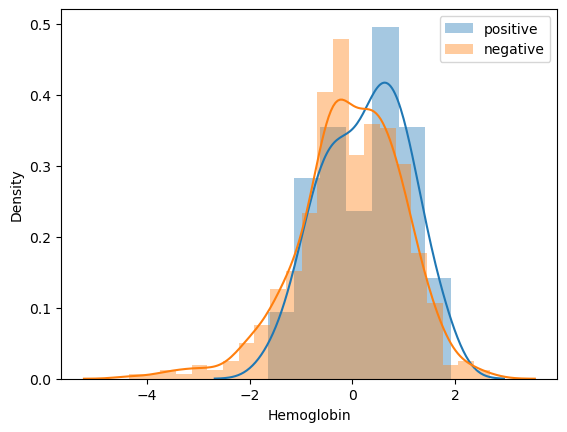

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

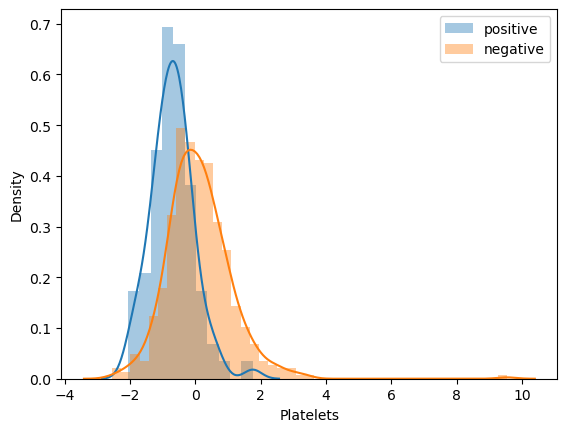

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

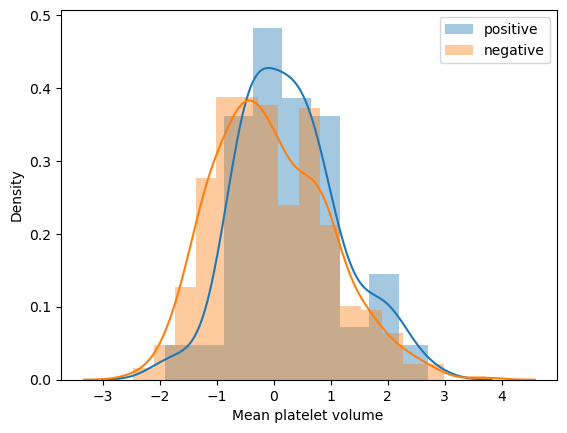

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

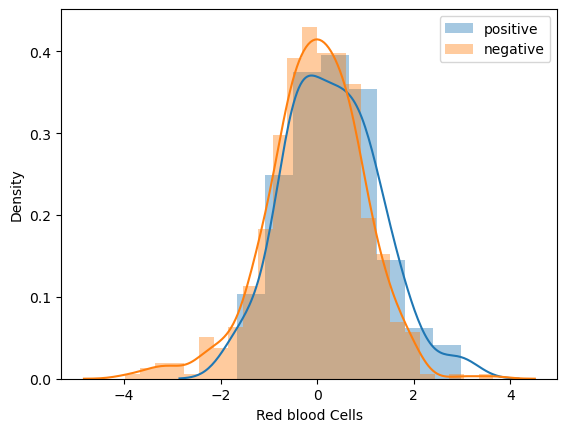

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

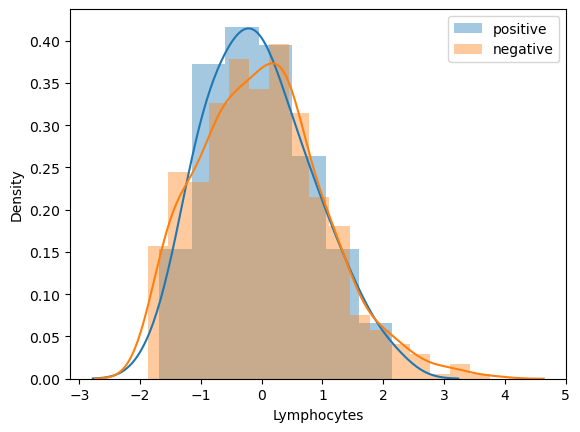

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

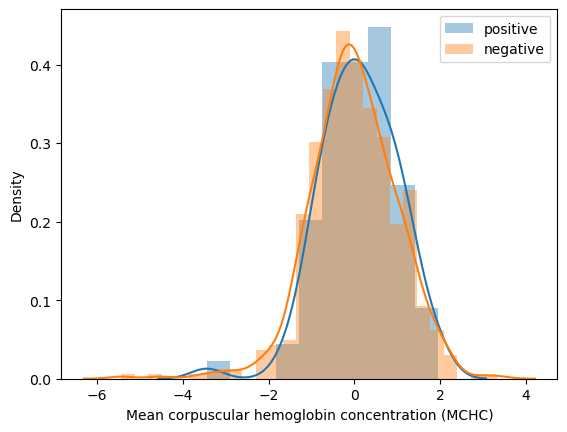

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

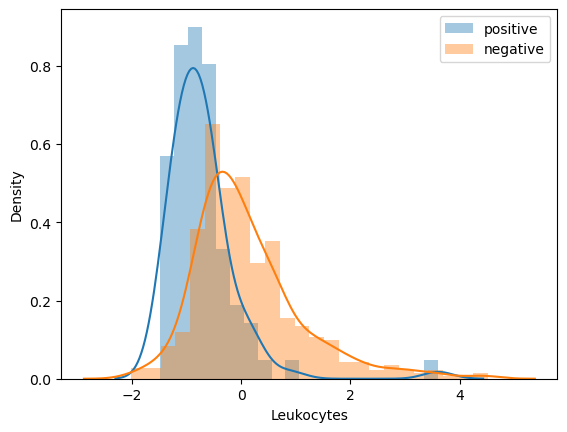

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

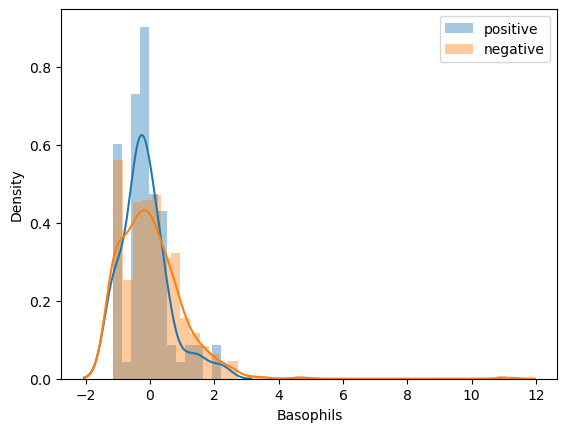

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

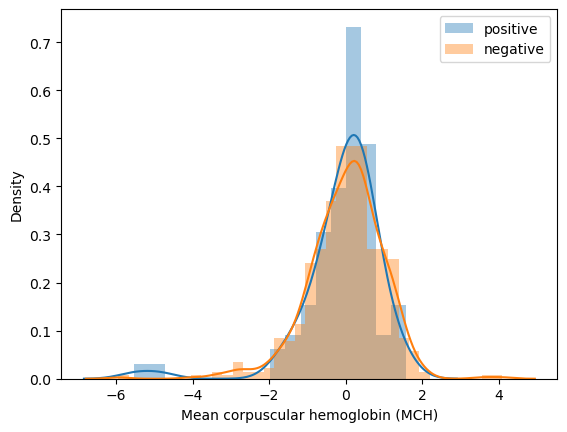

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

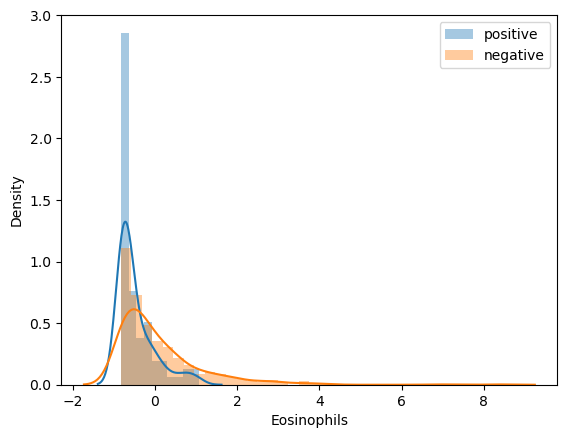

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

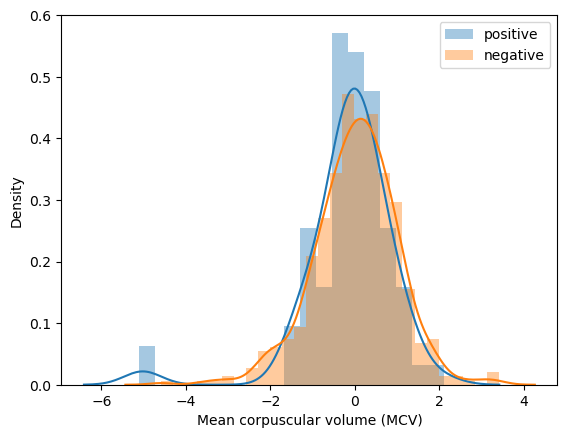

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

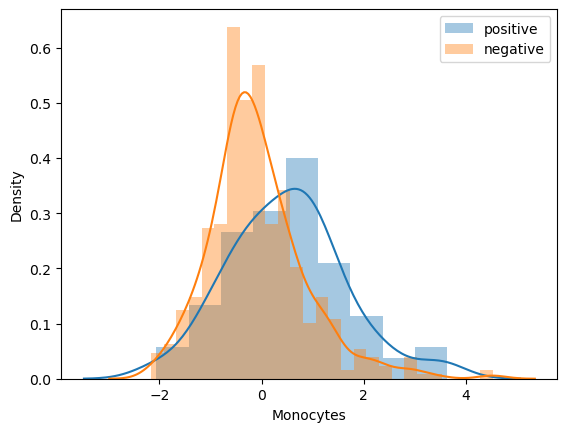

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1693301616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], 

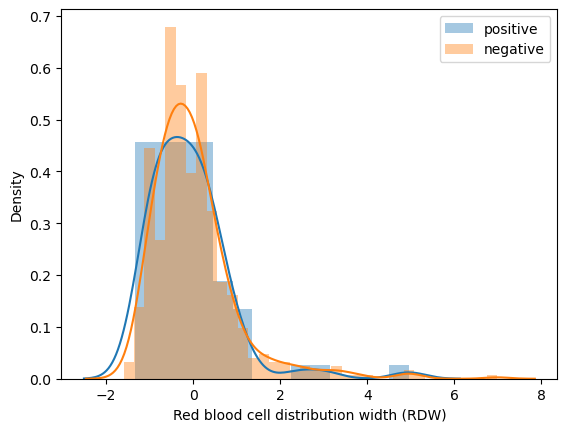

In [22]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label = 'positive')
    sns.distplot(negative_df[col], label = 'negative')
    plt.legend()
    plt.show()

# relation target / age

<Axes: xlabel='Patient age quantile', ylabel='count'>

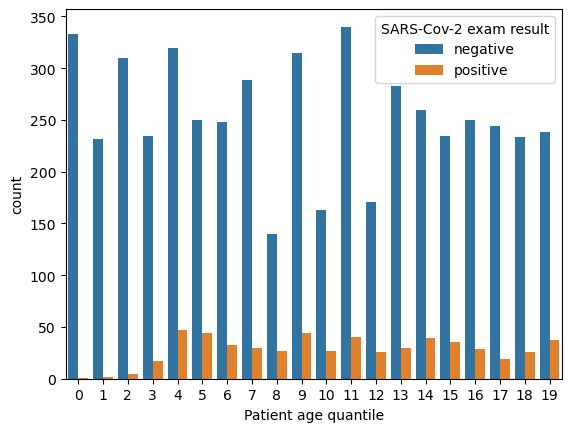

In [23]:
sns.countplot(x='Patient age quantile', hue = 'SARS-Cov-2 exam result', data=df)

In [24]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

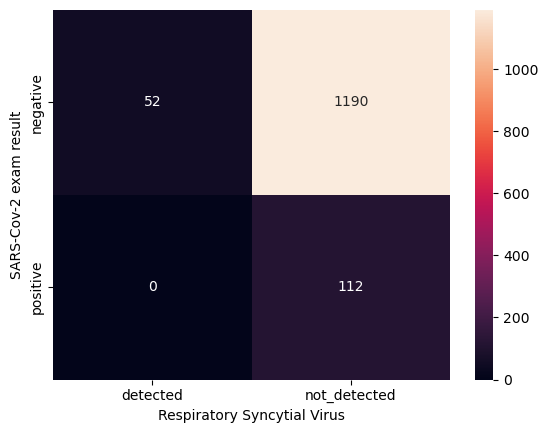

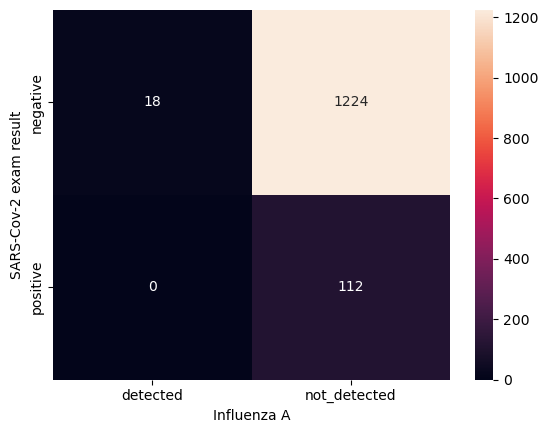

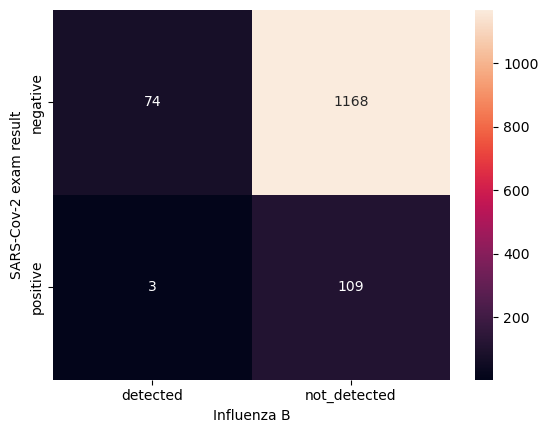

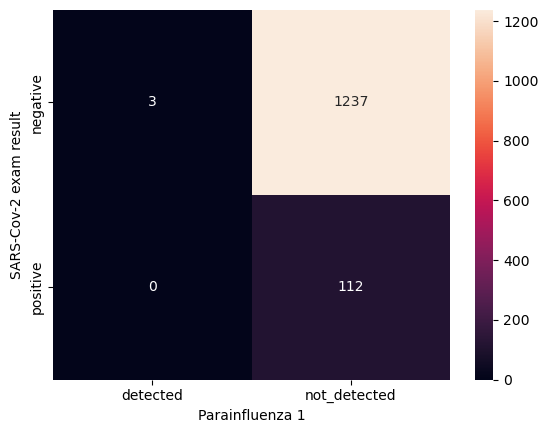

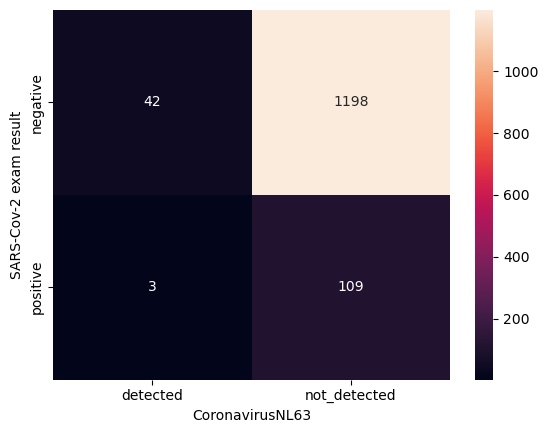

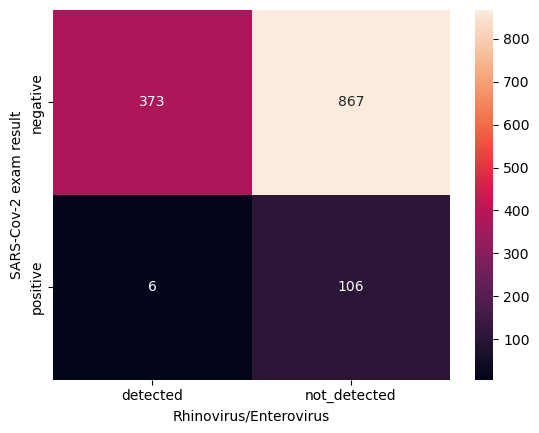

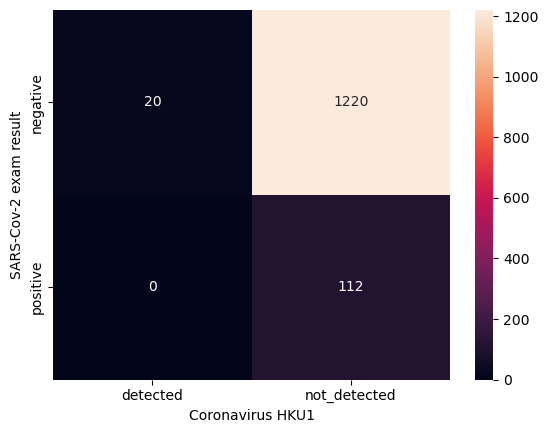

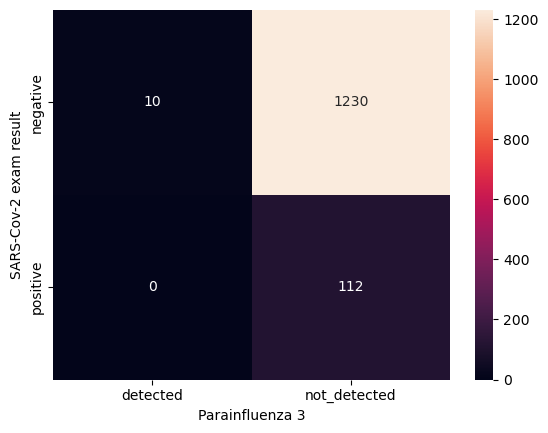

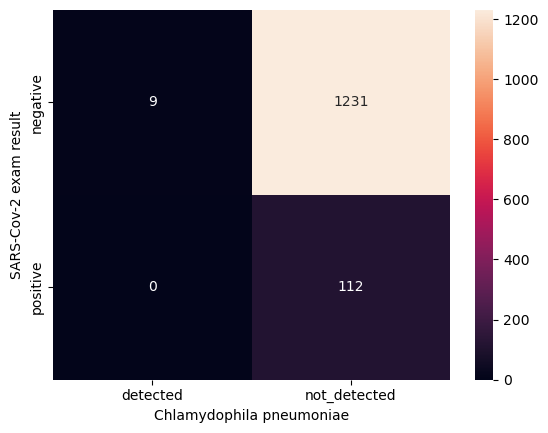

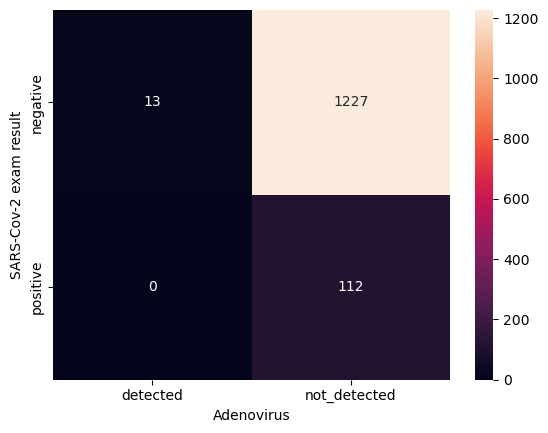

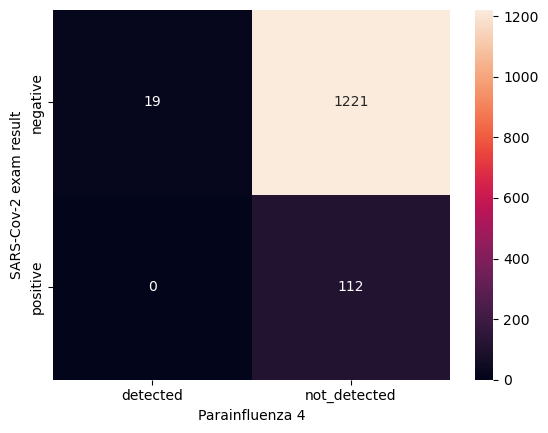

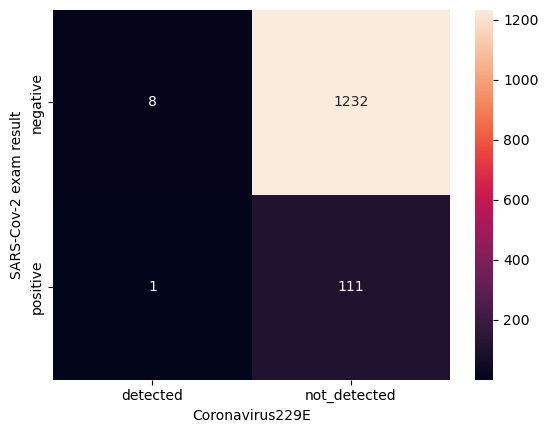

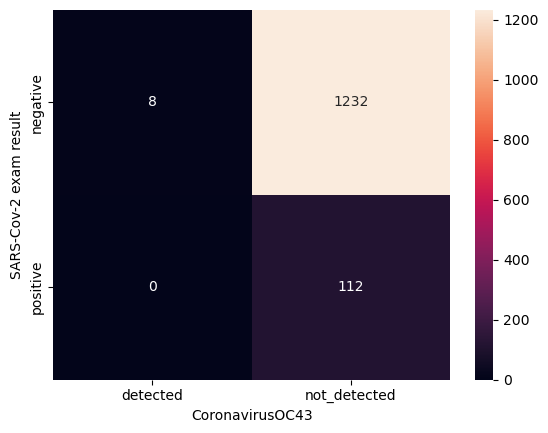

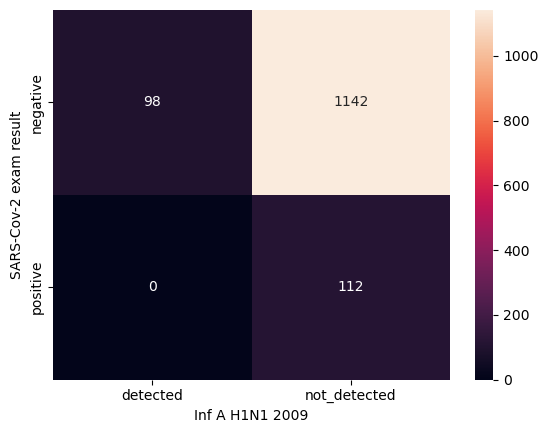

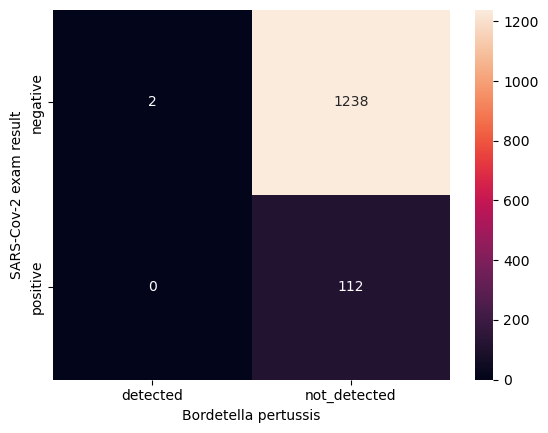

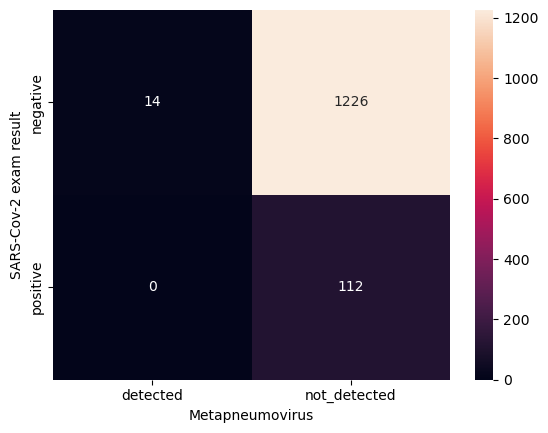

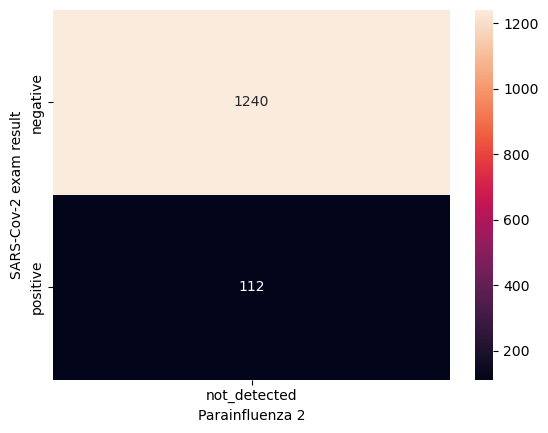

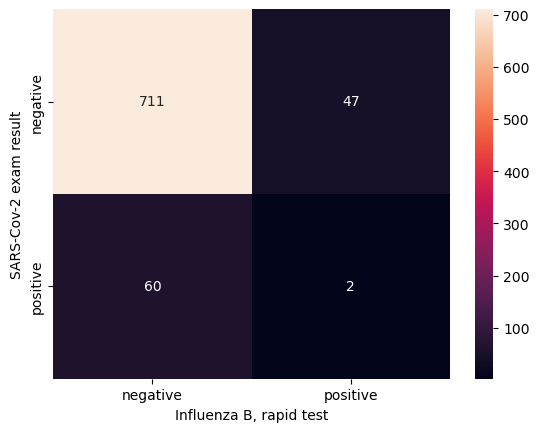

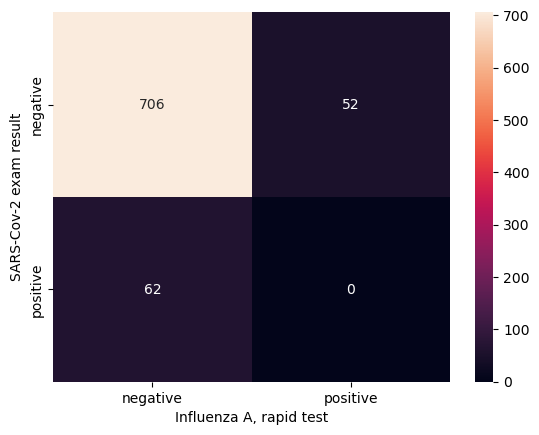

In [25]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]),
               annot = True, fmt = 'd')

# relation target / viral

# analyse plus detaillee
# relation variable / variable
### relation taux sanguin

C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


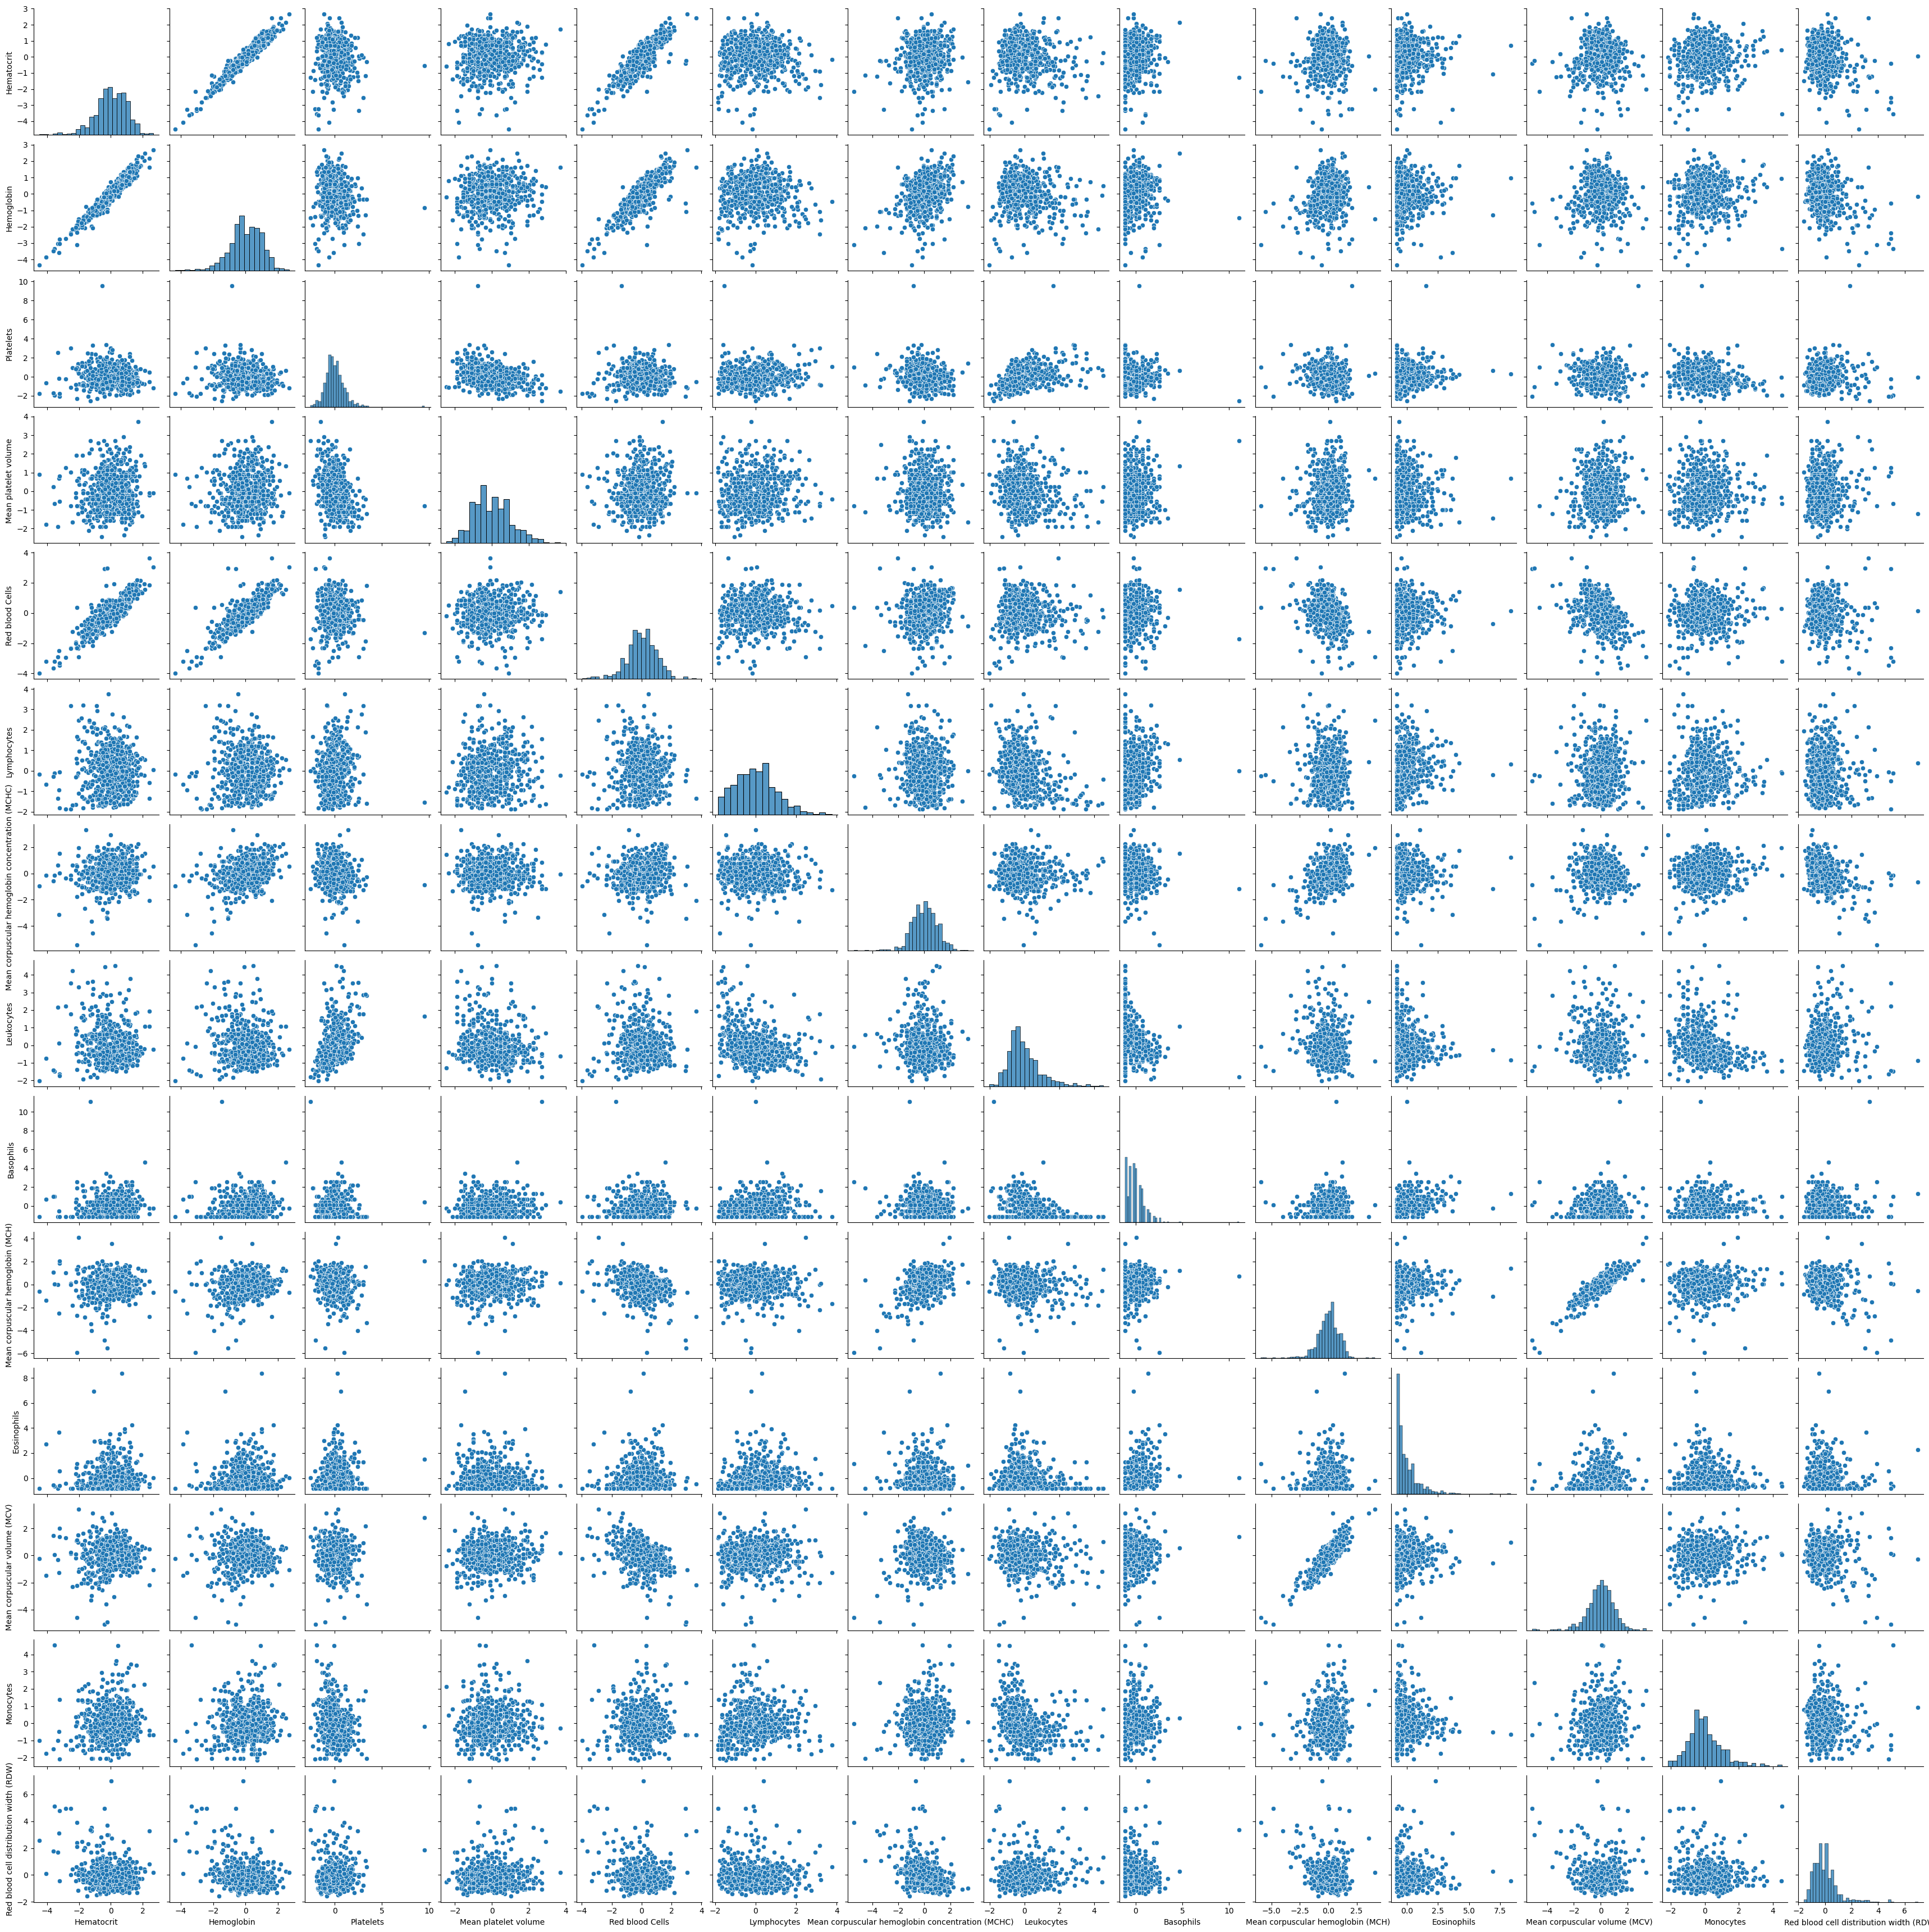

In [26]:
sns.pairplot(df[blood_columns])

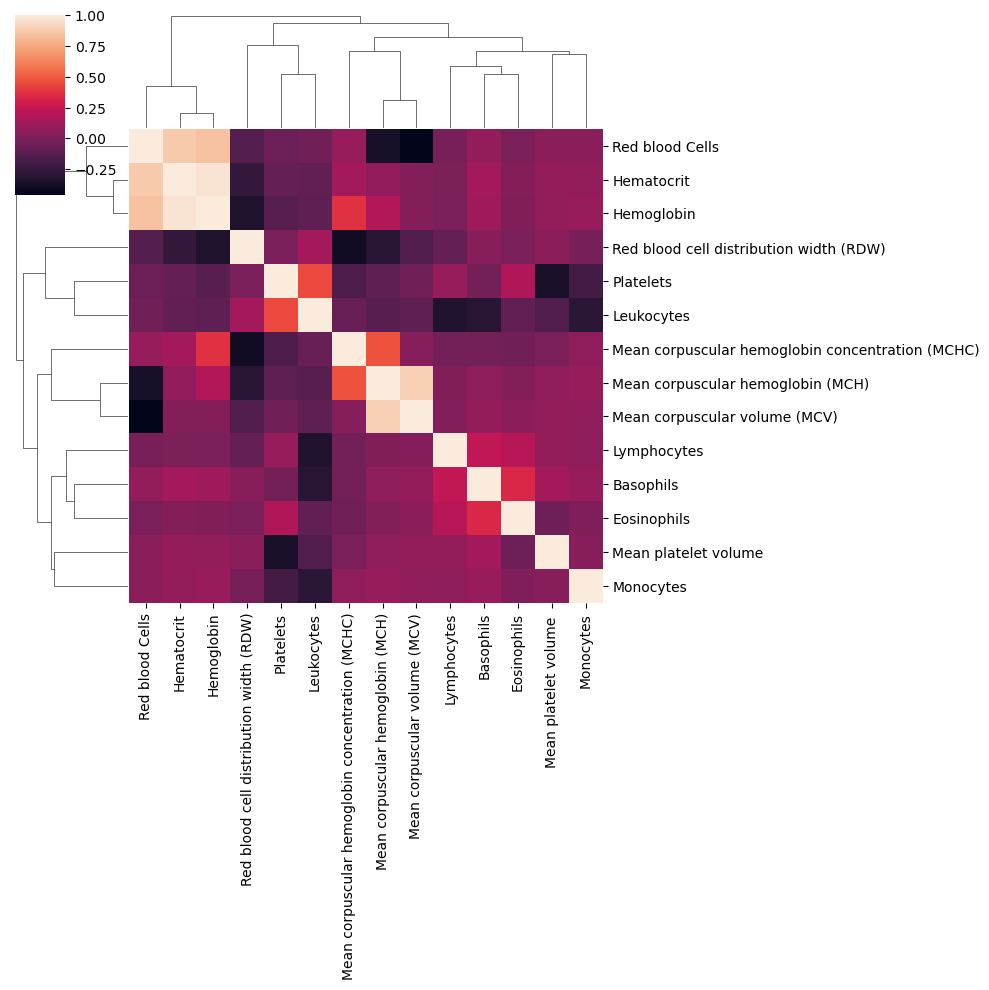

In [27]:
sns.clustermap(df[blood_columns].corr())

C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<Figure size 640x480 with 0 Axes>

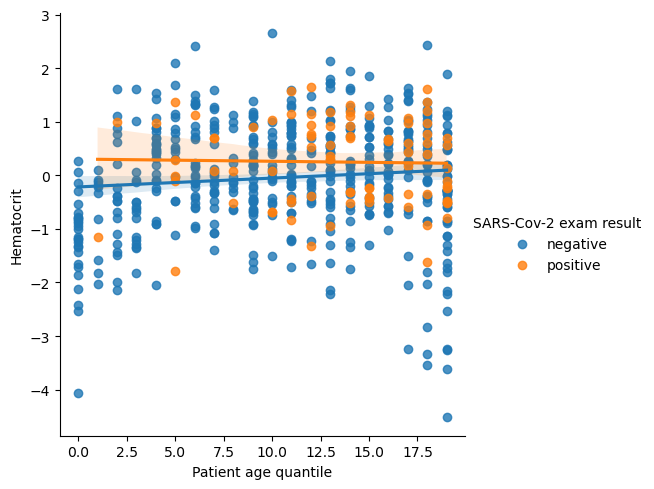

<Figure size 640x480 with 0 Axes>

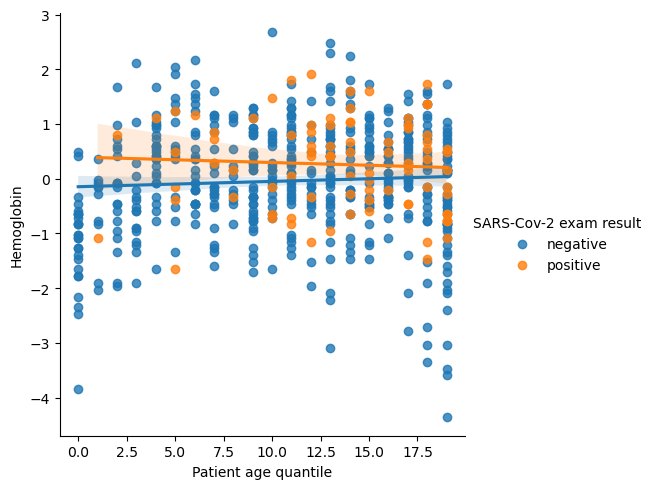

<Figure size 640x480 with 0 Axes>

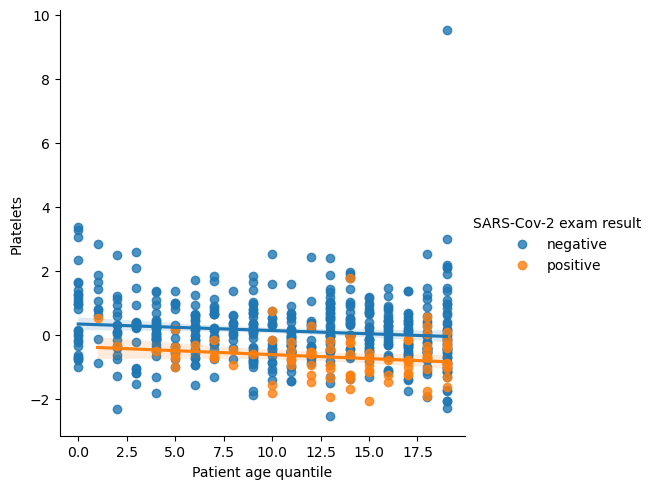

<Figure size 640x480 with 0 Axes>

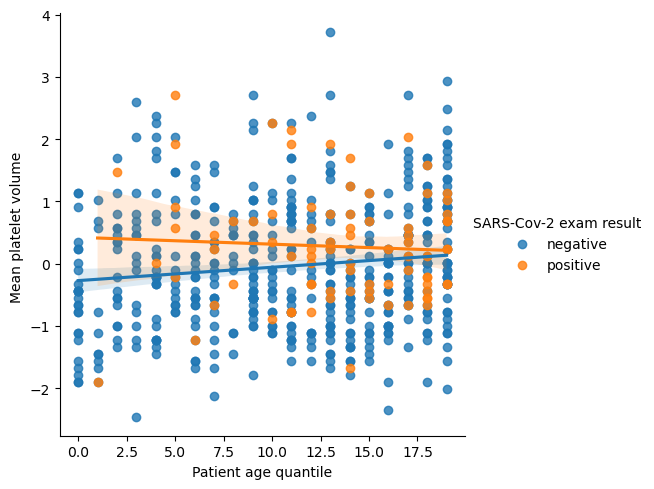

<Figure size 640x480 with 0 Axes>

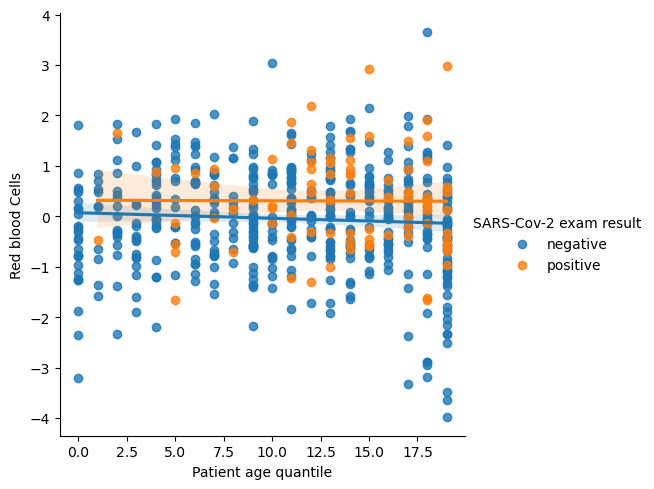

<Figure size 640x480 with 0 Axes>

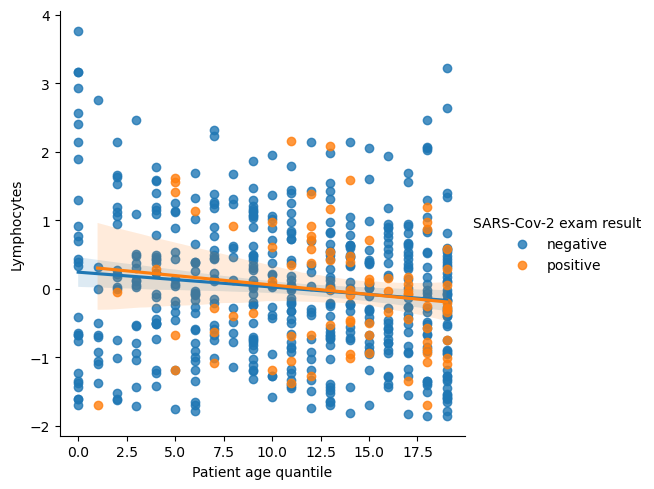

<Figure size 640x480 with 0 Axes>

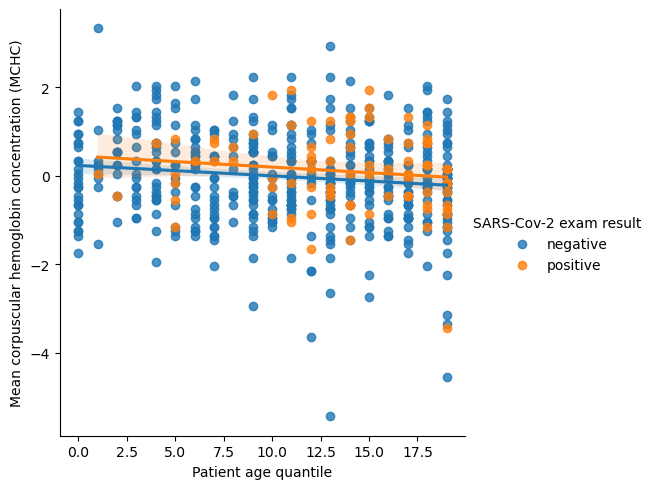

<Figure size 640x480 with 0 Axes>

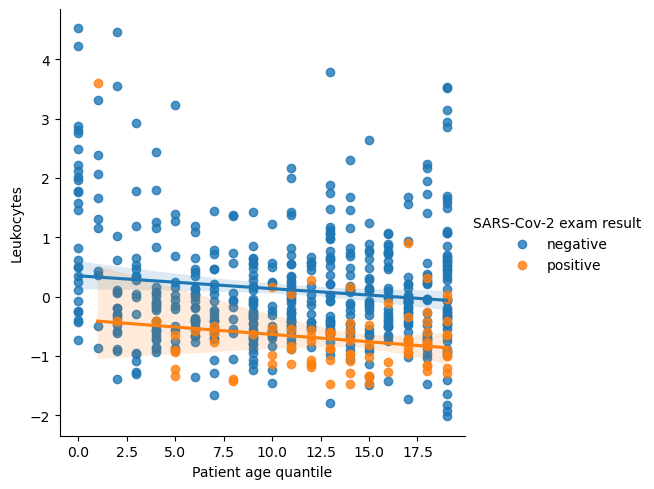

<Figure size 640x480 with 0 Axes>

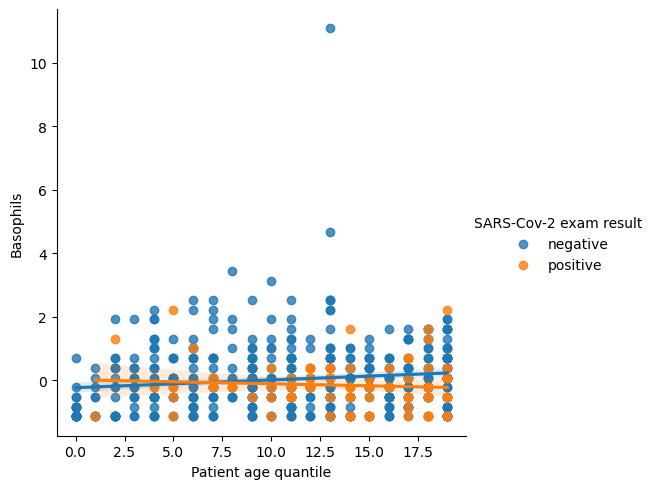

<Figure size 640x480 with 0 Axes>

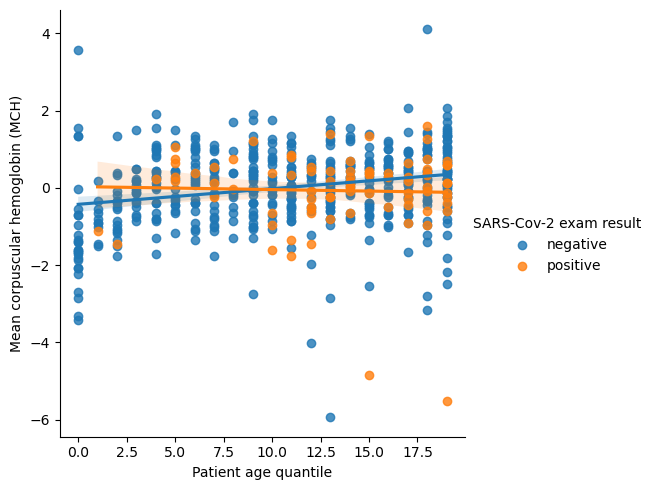

<Figure size 640x480 with 0 Axes>

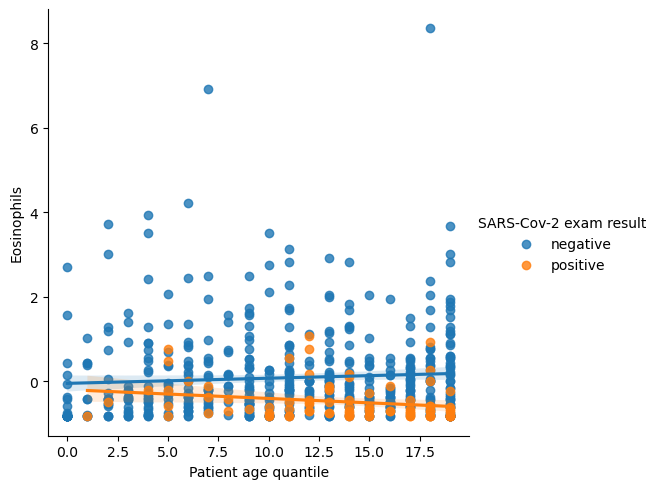

<Figure size 640x480 with 0 Axes>

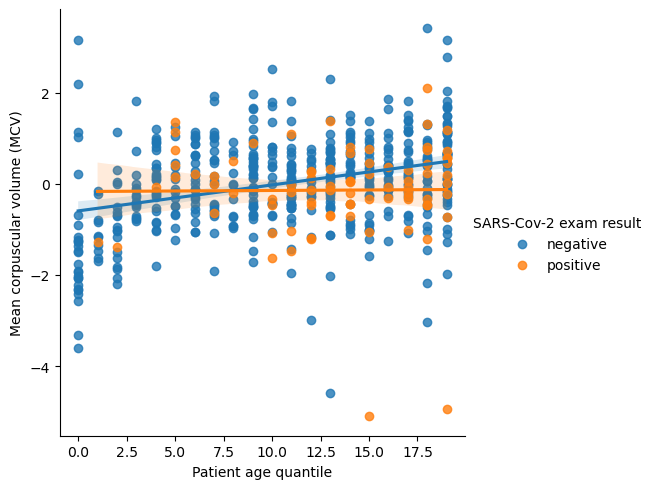

<Figure size 640x480 with 0 Axes>

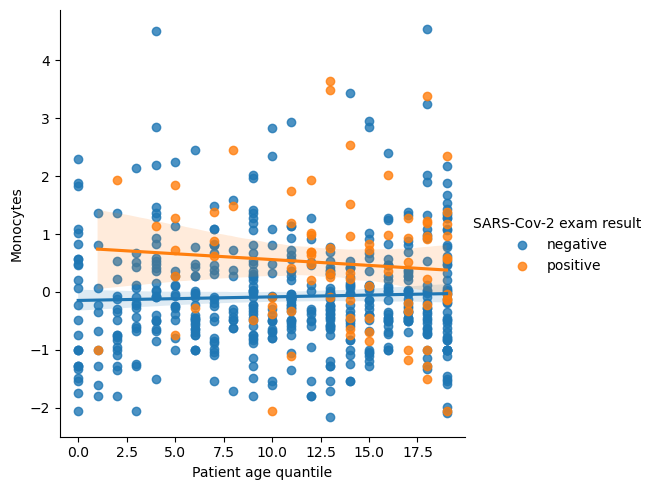

<Figure size 640x480 with 0 Axes>

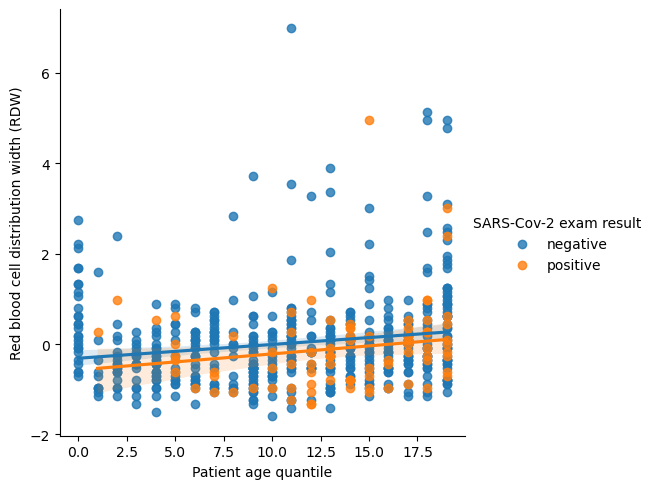

In [28]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x = 'Patient age quantile', y =col,
               hue = 'SARS-Cov-2 exam result', data = df)

In [29]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [30]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

# relation viral/blood

#### creation d'une nouvelle variable " est malade" 

In [31]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis = 1)>=1

In [32]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test est malade  
0                      NaN                      NaN      False  
1                 negative                 negative       True  
2                      NaN                      NaN      False  
3                      NaN                      NaN      False  
4                      NaN                      NaN       True  

[5 rows x 39 columns]

In [33]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

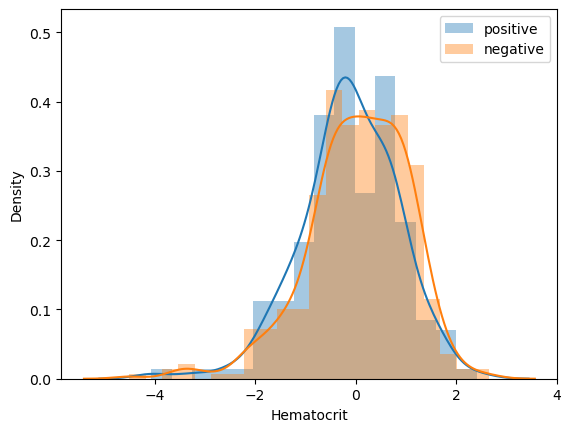

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

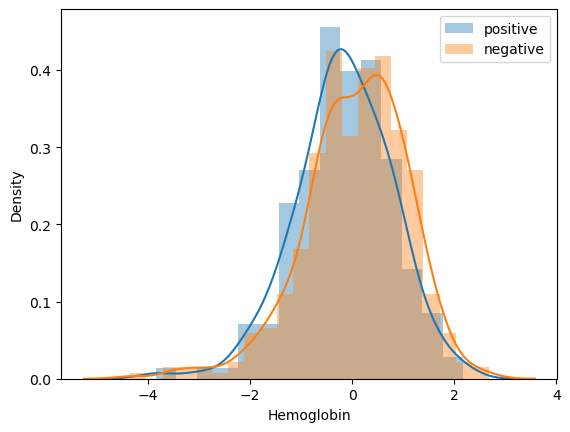

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

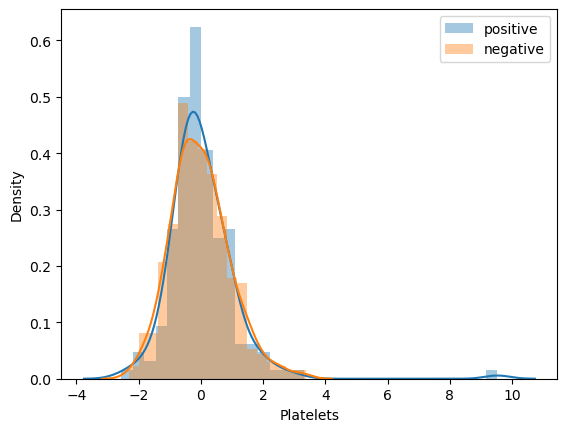

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

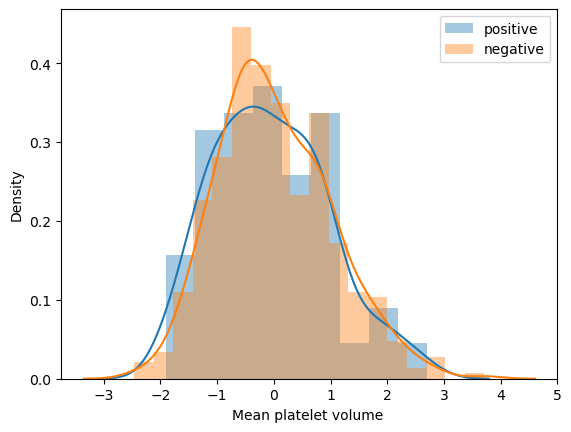

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

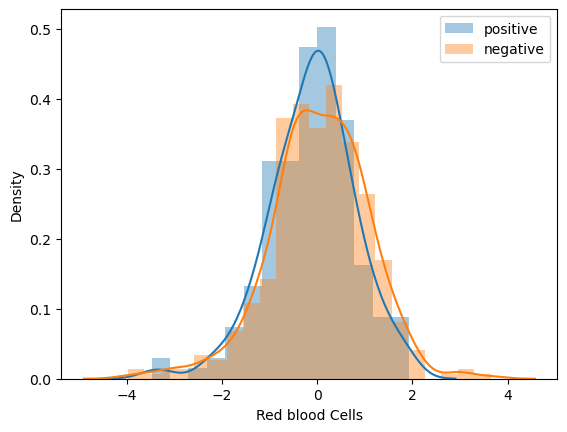

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

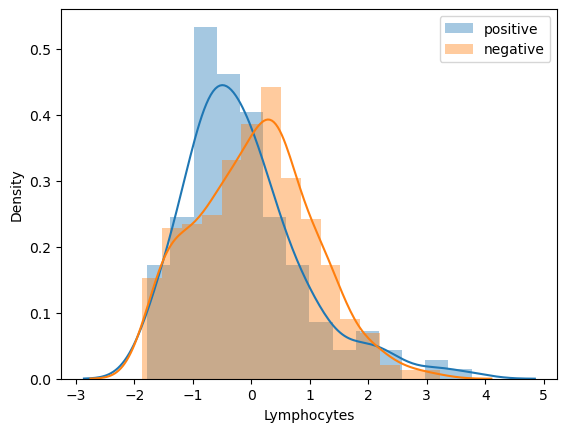

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

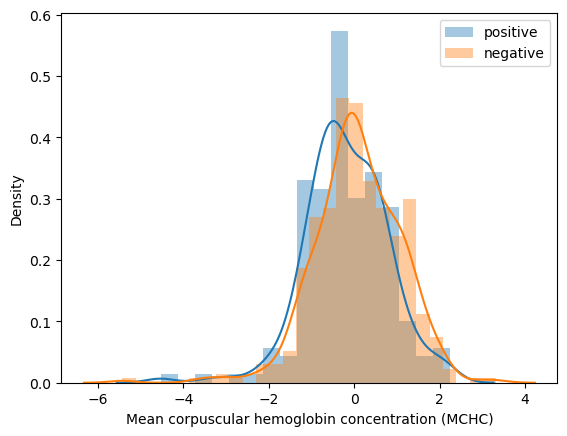

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

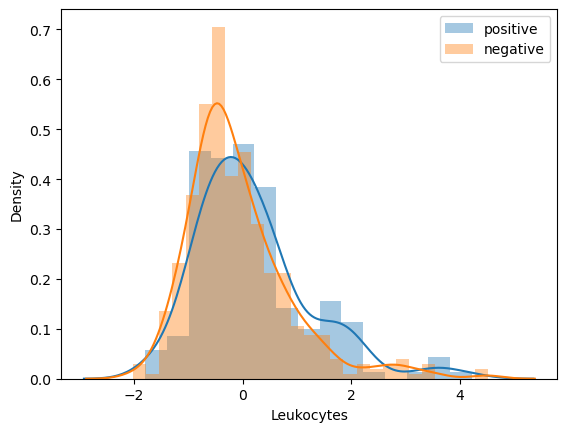

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

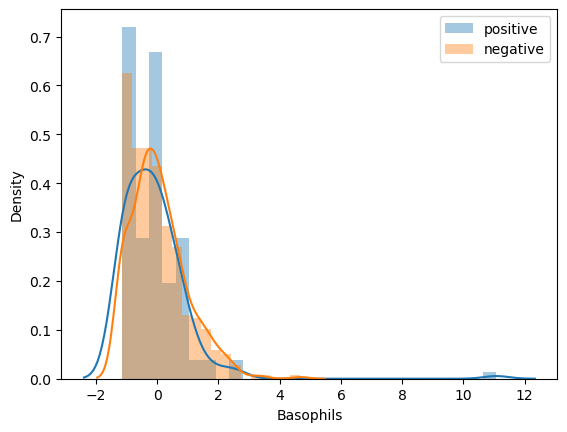

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

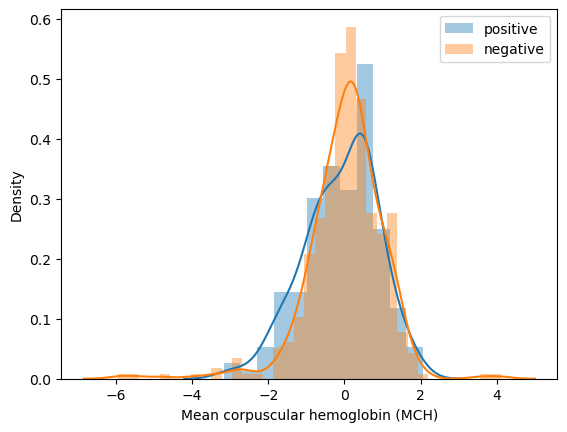

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

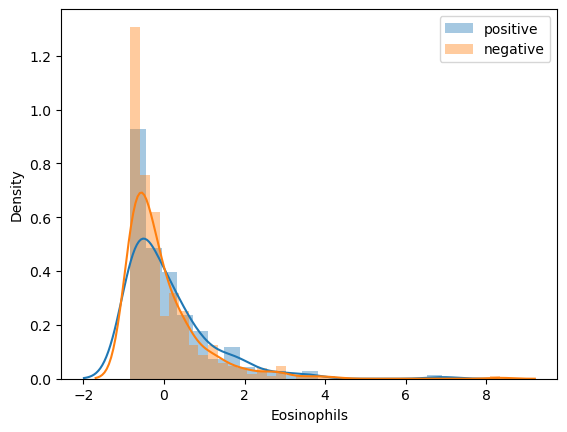

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

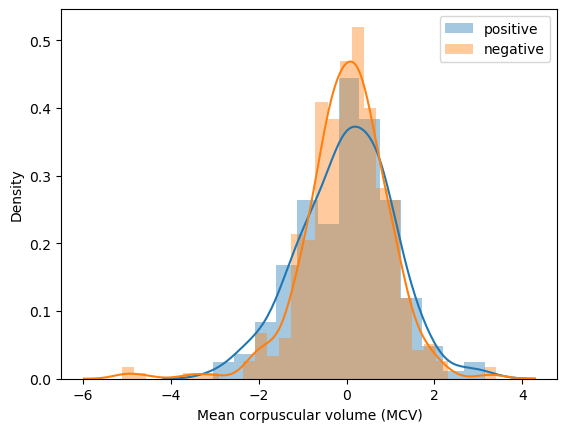

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

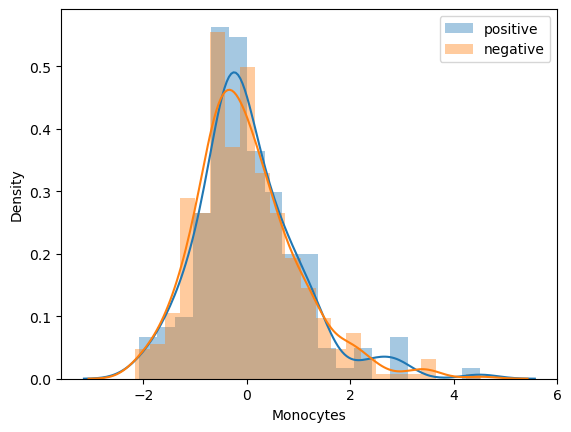

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'positive')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\4107289850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], 

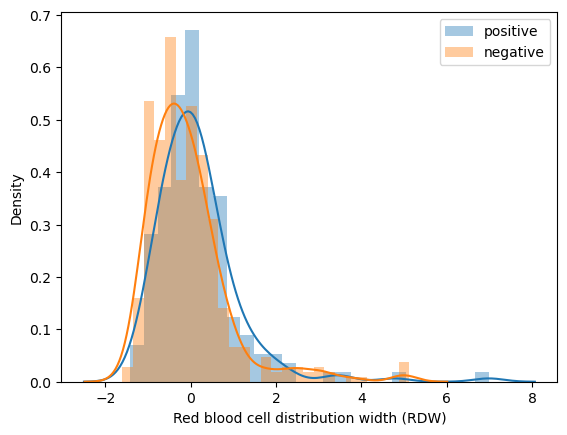

In [34]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label = 'positive')
    sns.distplot(non_malade_df[col], label = 'negative')
    plt.legend()
    plt.show()

In [35]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'soins semi intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [36]:
df['statut'] = df.apply(hospitalisation, axis = 1)

C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<Figure size 640x480 with 0 Axes>

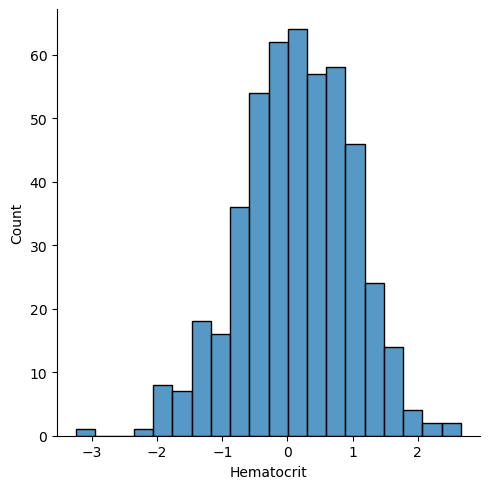

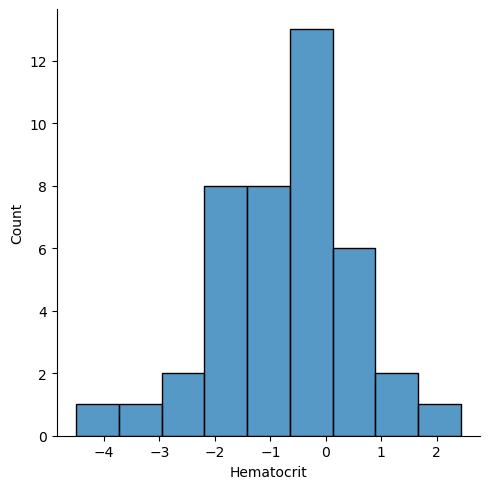

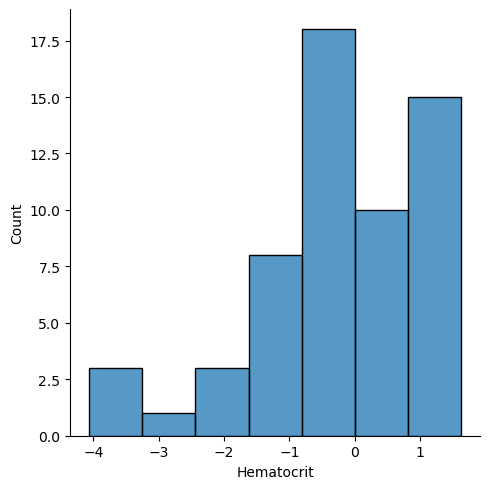

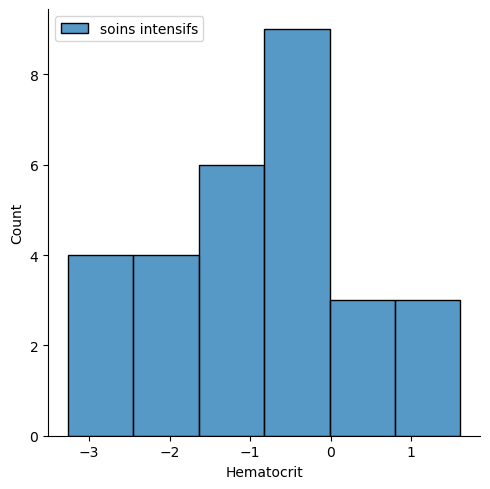

<Figure size 640x480 with 0 Axes>

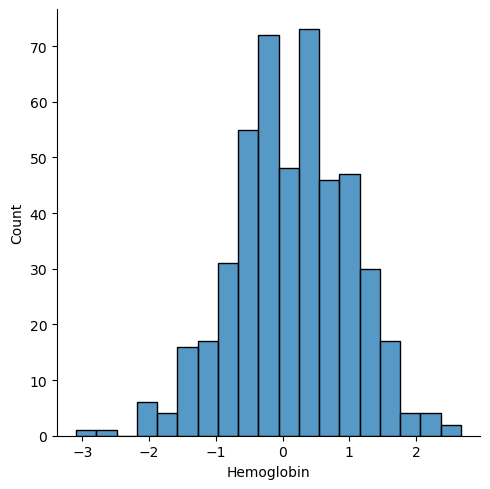

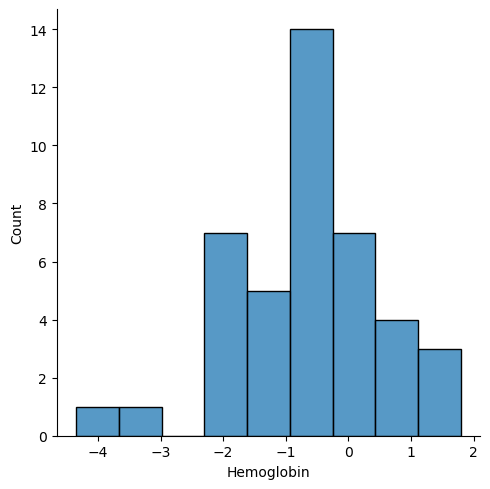

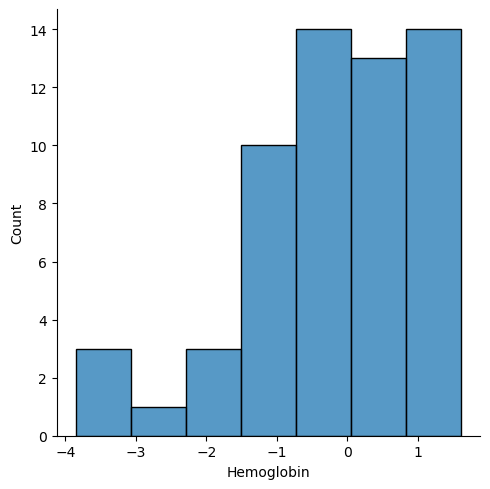

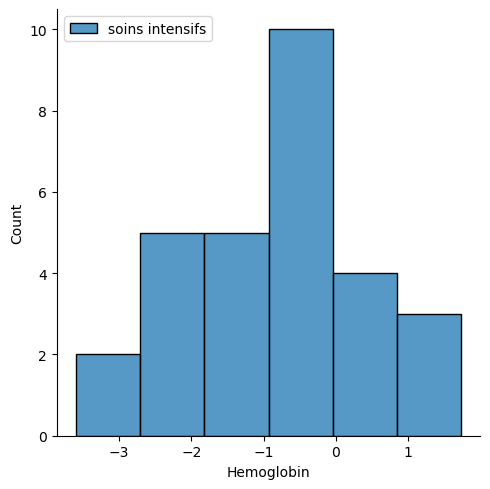

<Figure size 640x480 with 0 Axes>

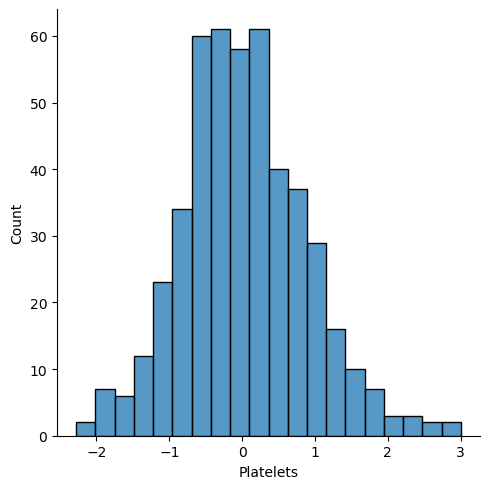

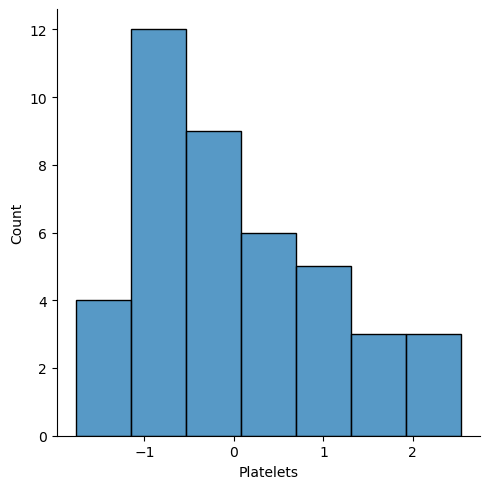

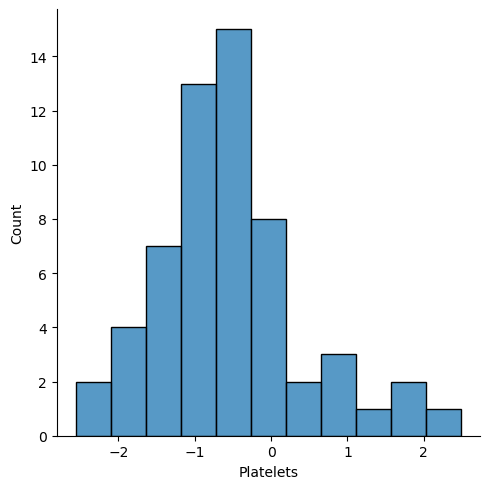

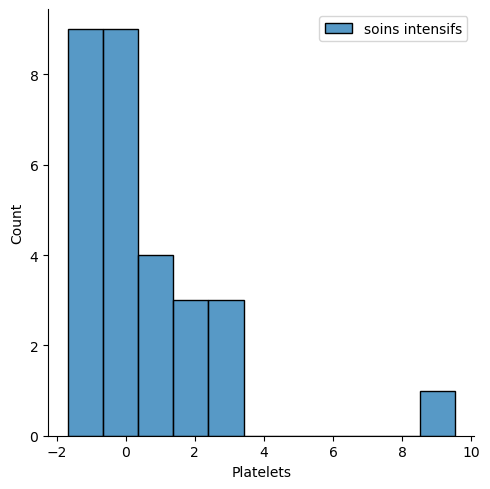

<Figure size 640x480 with 0 Axes>

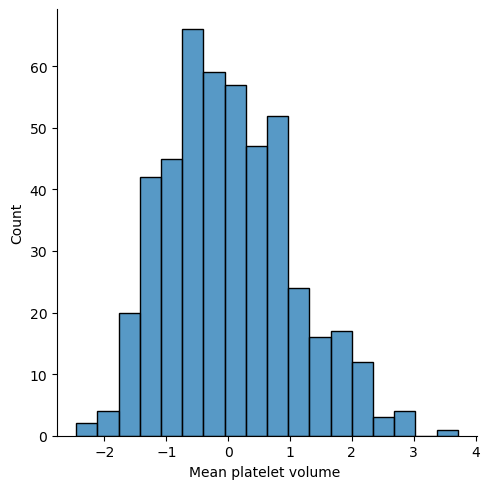

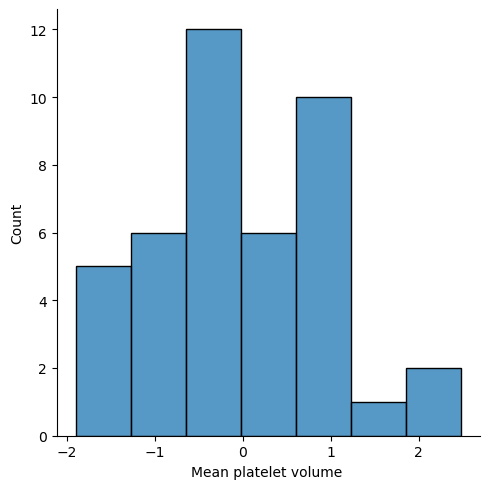

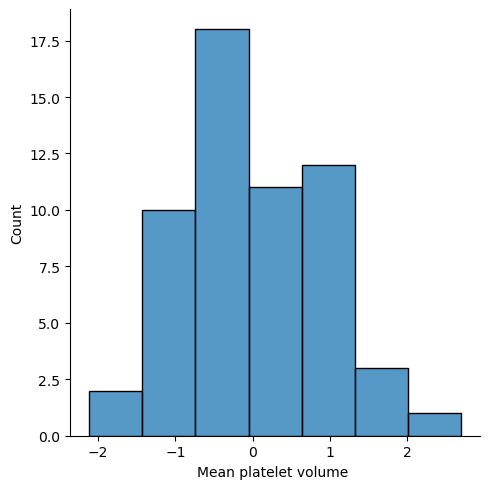

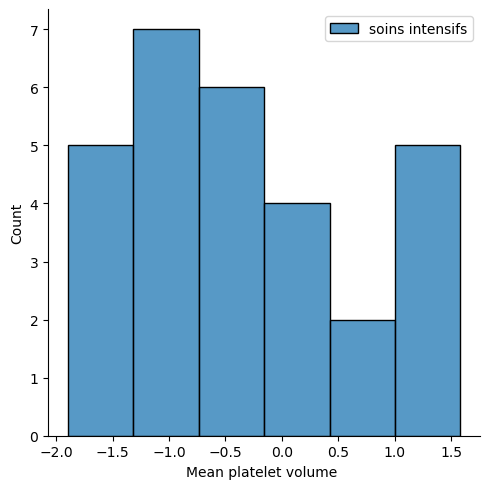

<Figure size 640x480 with 0 Axes>

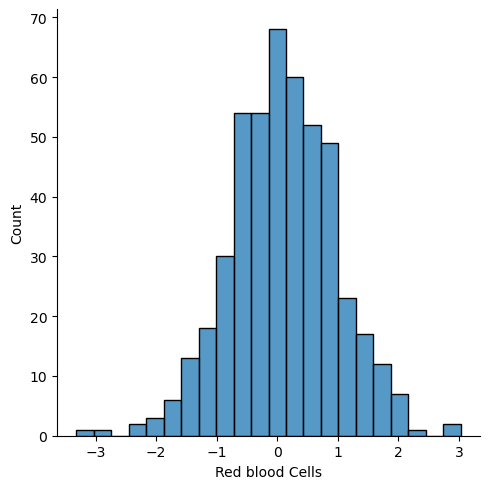

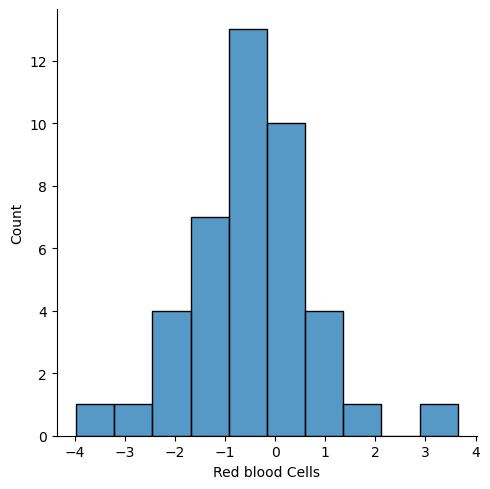

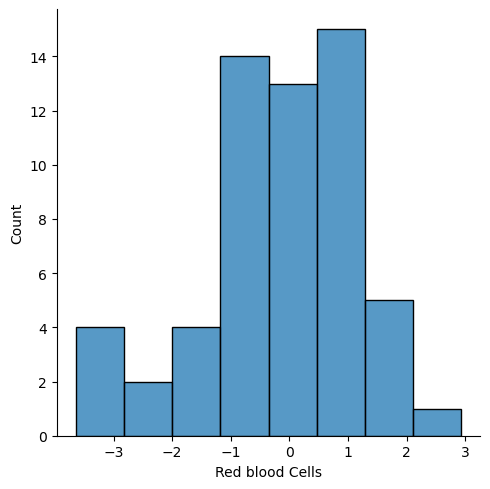

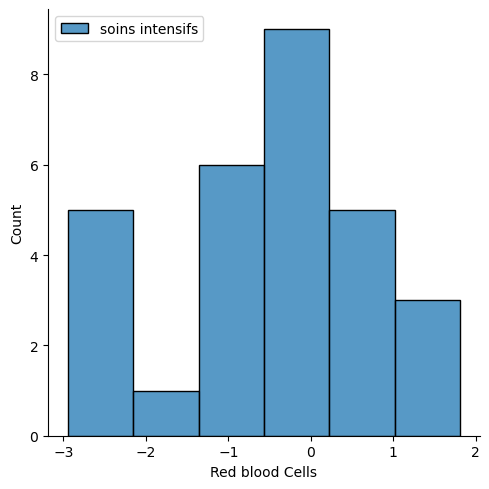

<Figure size 640x480 with 0 Axes>

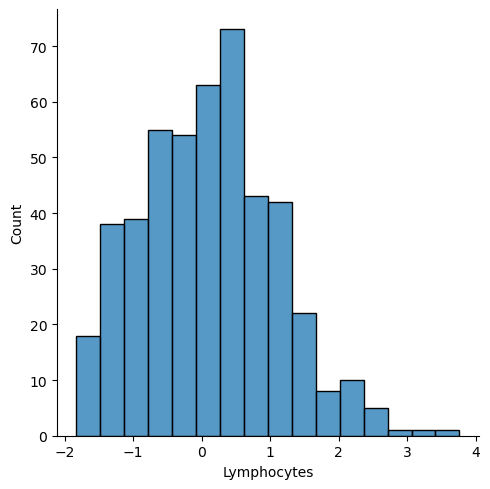

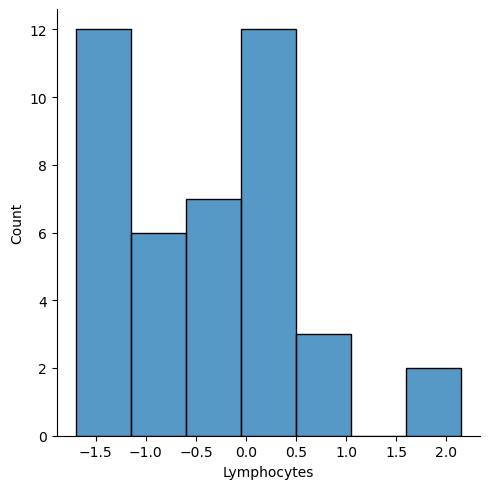

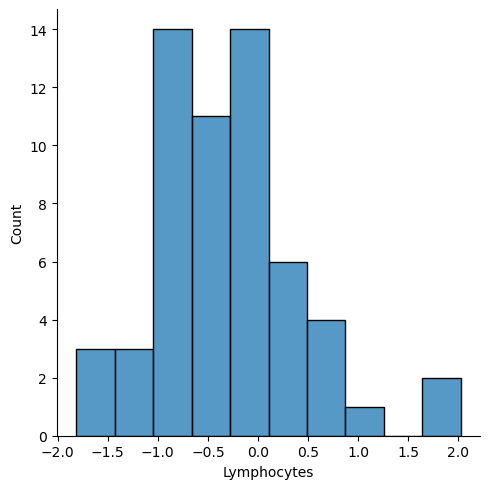

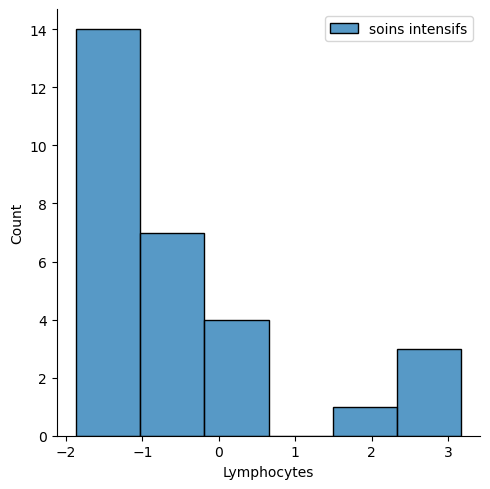

<Figure size 640x480 with 0 Axes>

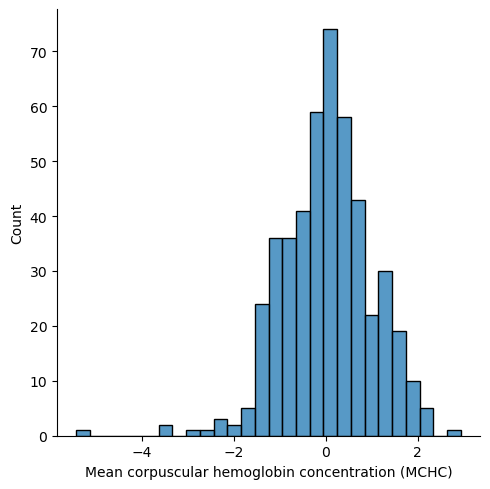

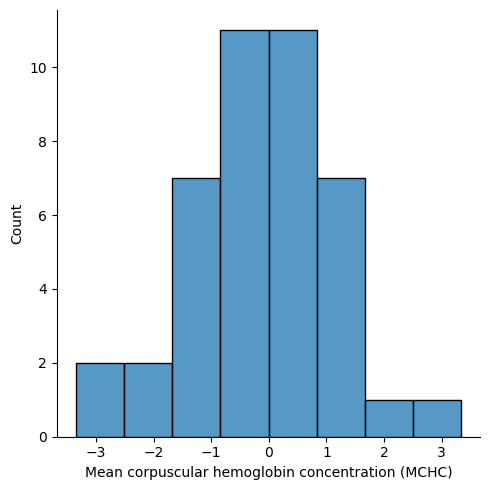

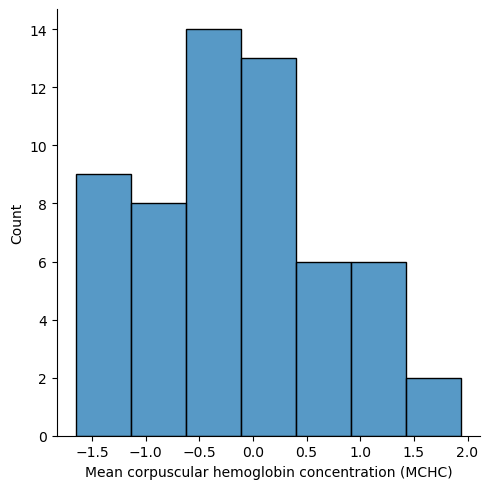

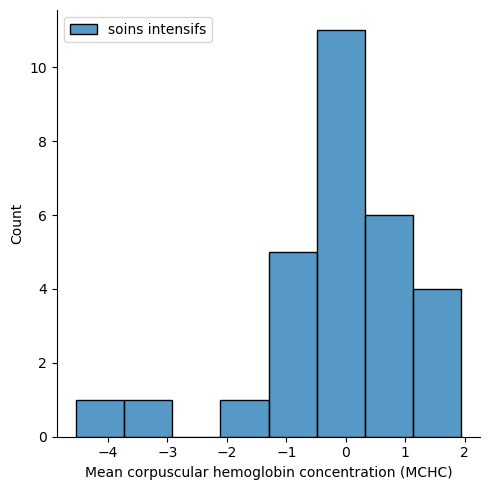

<Figure size 640x480 with 0 Axes>

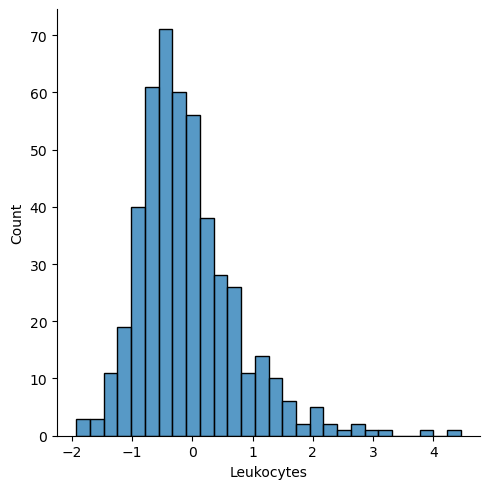

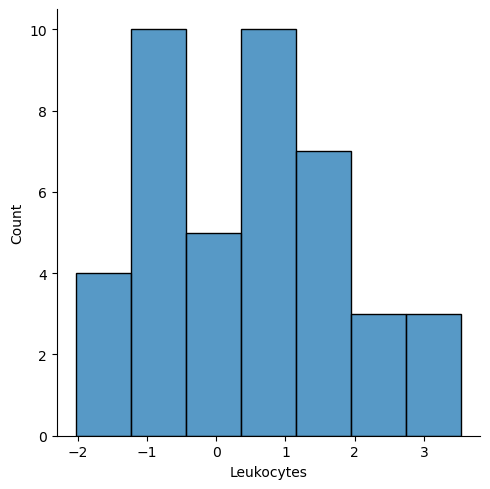

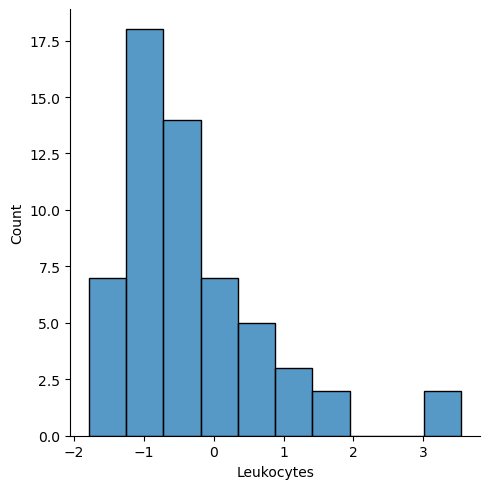

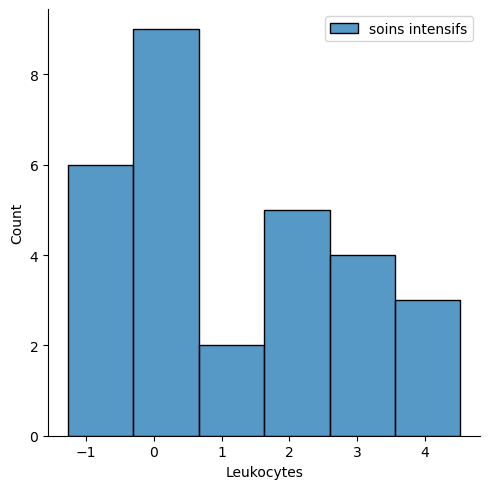

<Figure size 640x480 with 0 Axes>

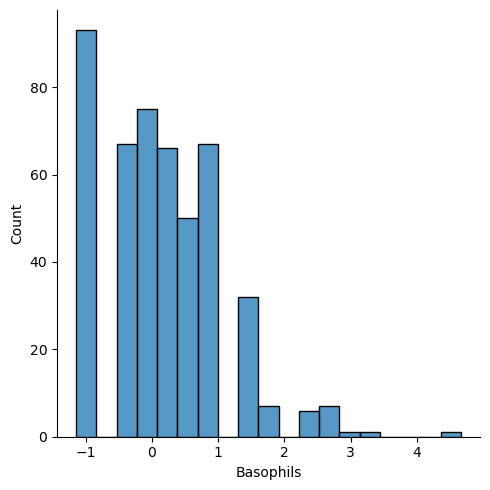

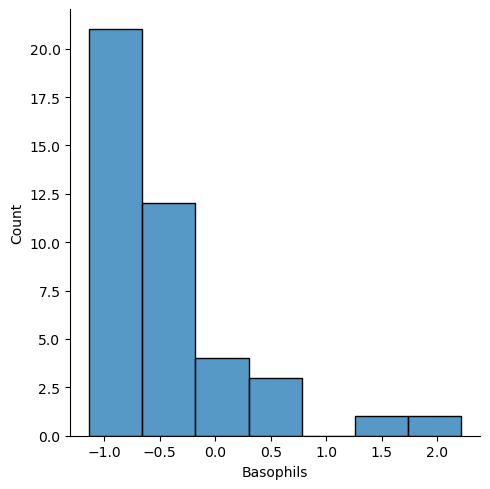

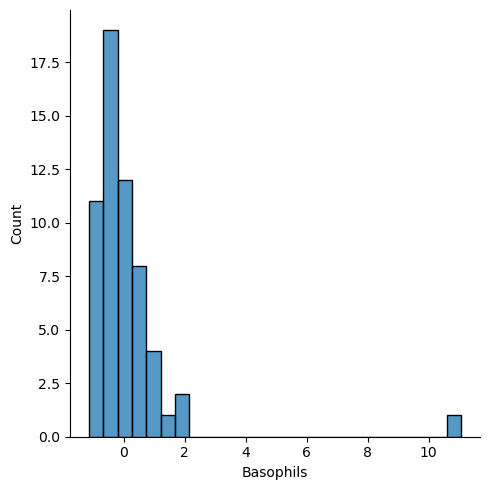

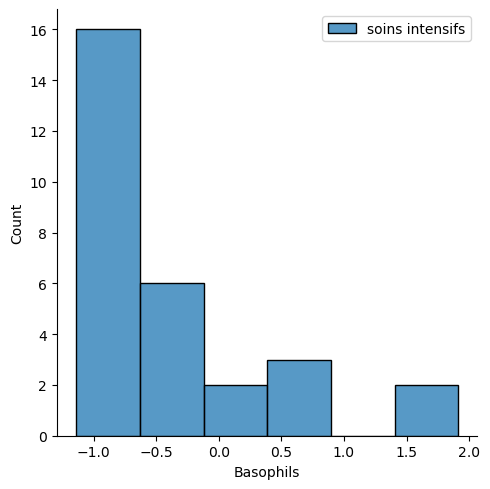

<Figure size 640x480 with 0 Axes>

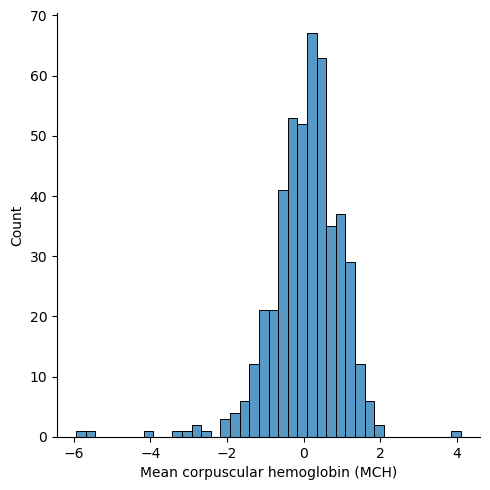

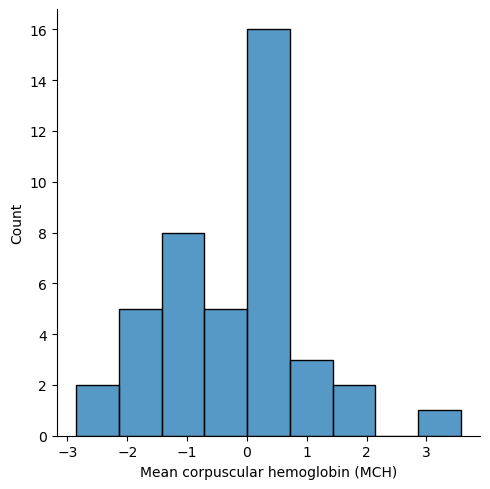

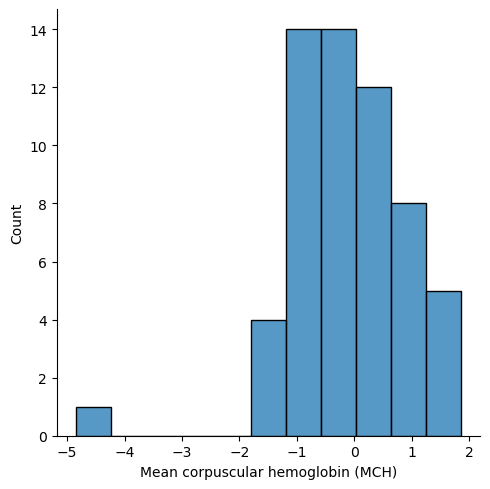

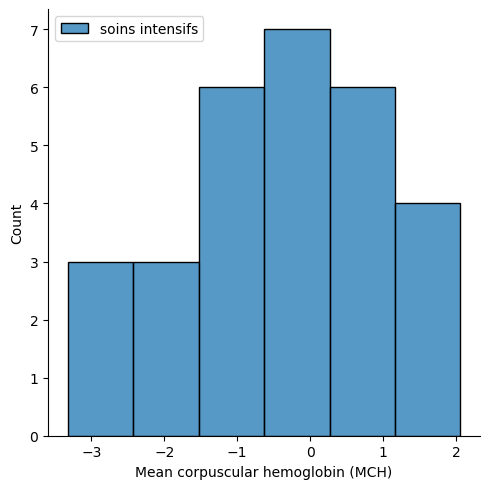

<Figure size 640x480 with 0 Axes>

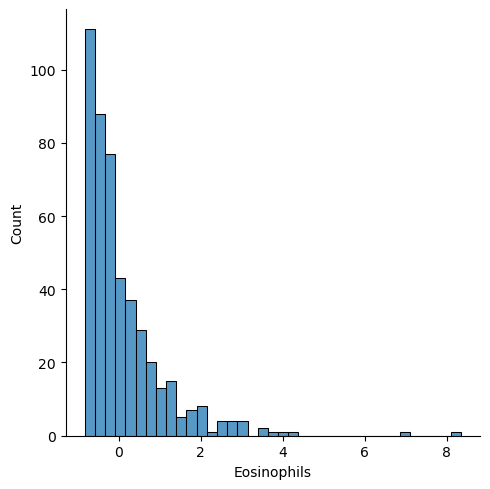

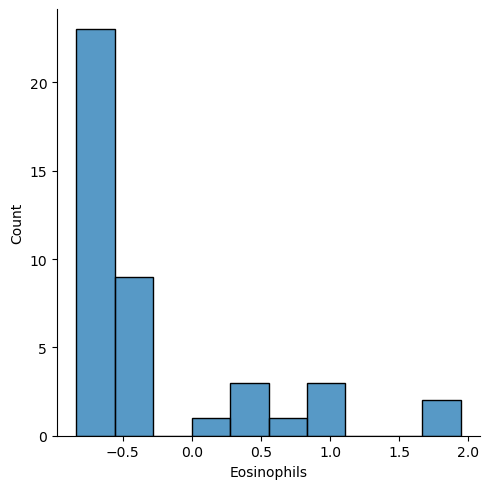

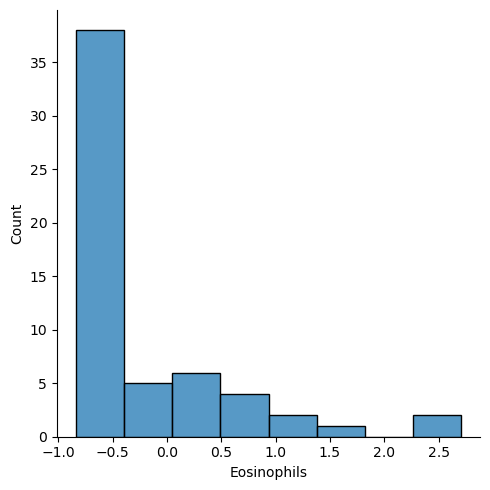

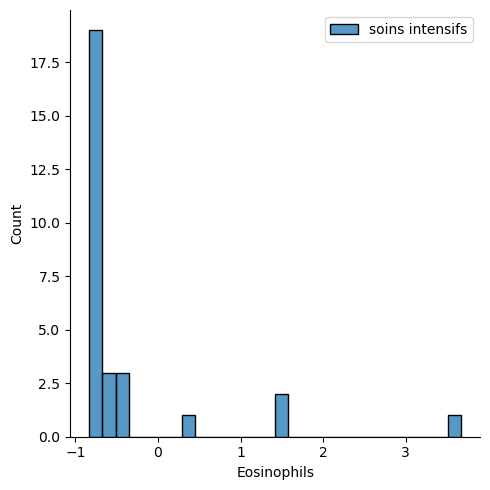

<Figure size 640x480 with 0 Axes>

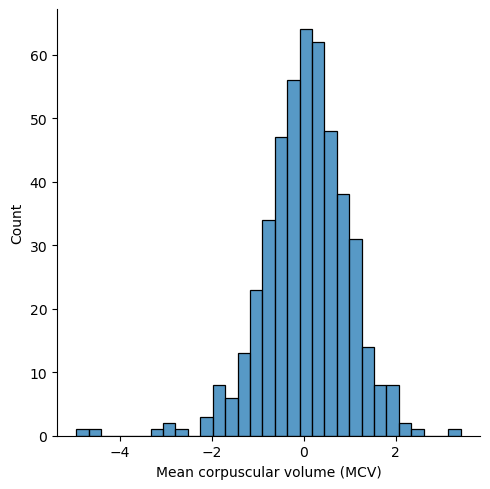

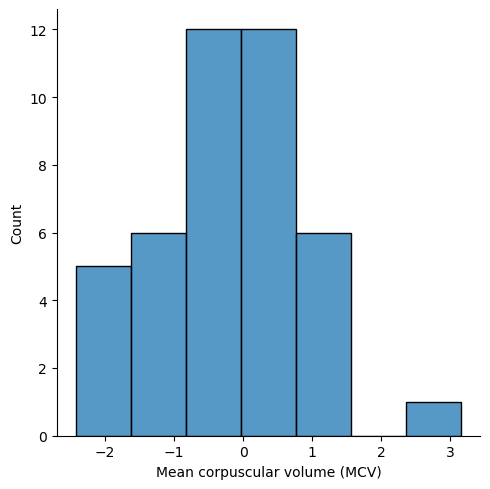

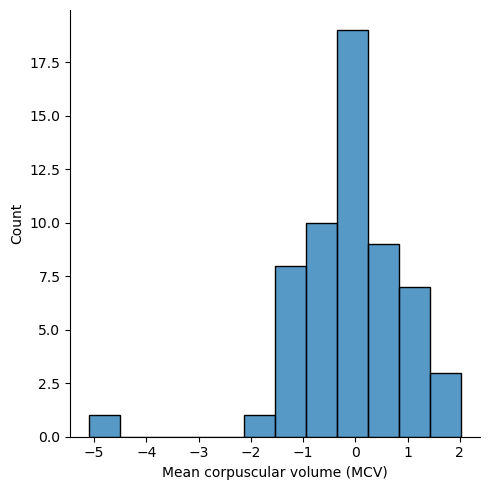

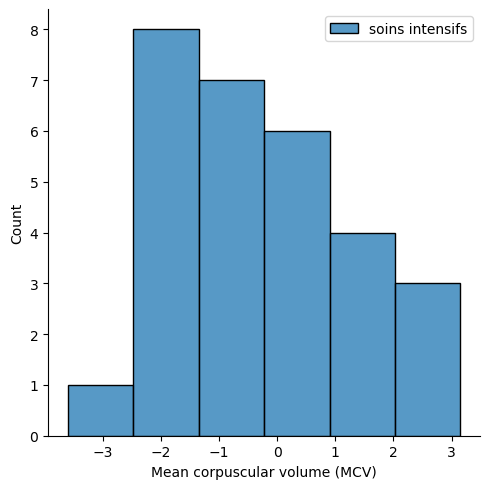

<Figure size 640x480 with 0 Axes>

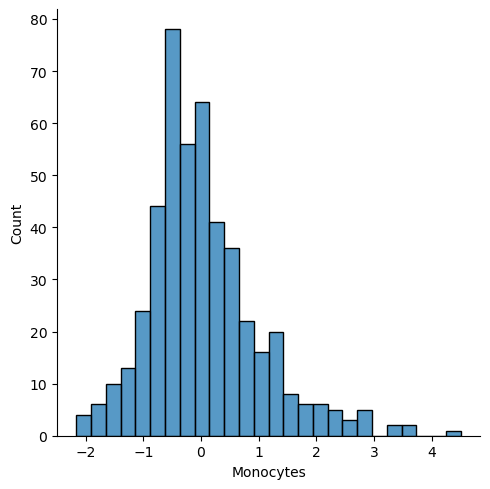

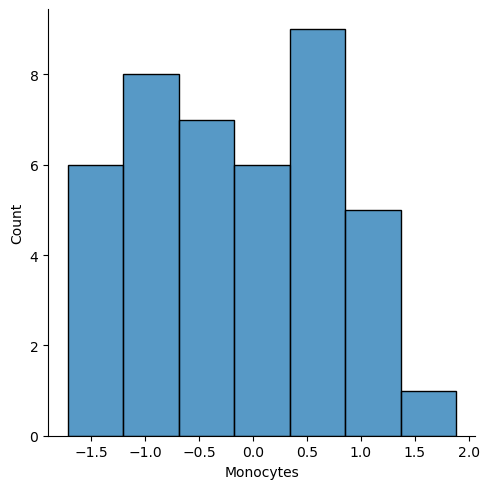

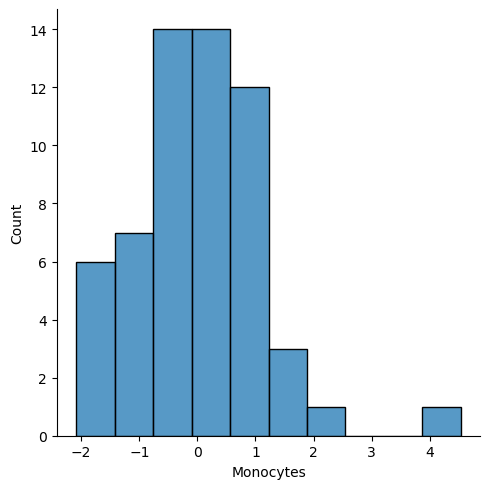

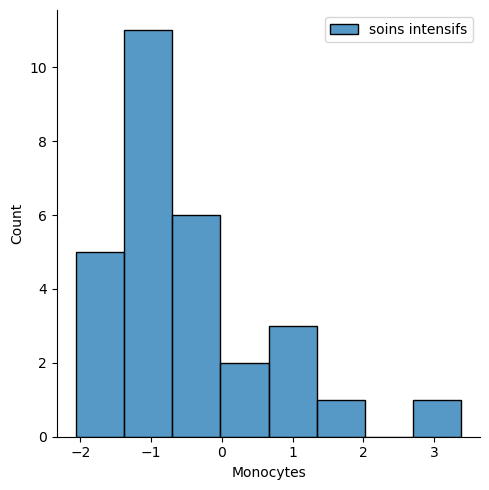

<Figure size 640x480 with 0 Axes>

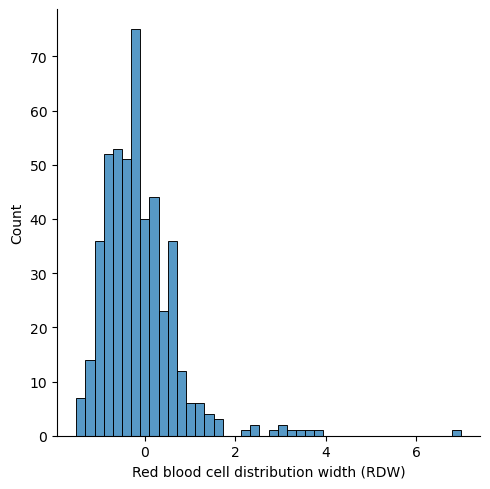

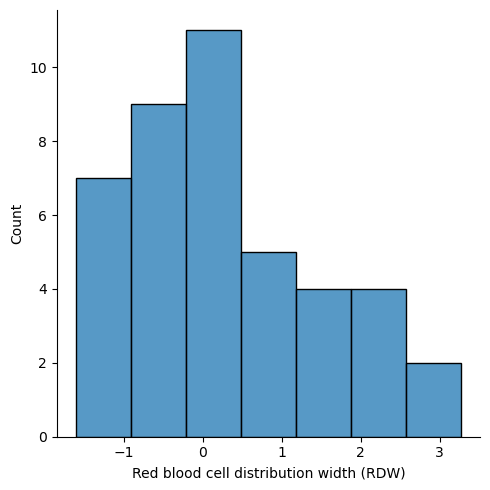

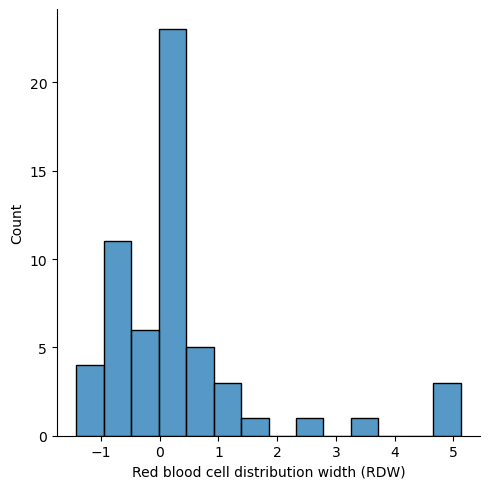

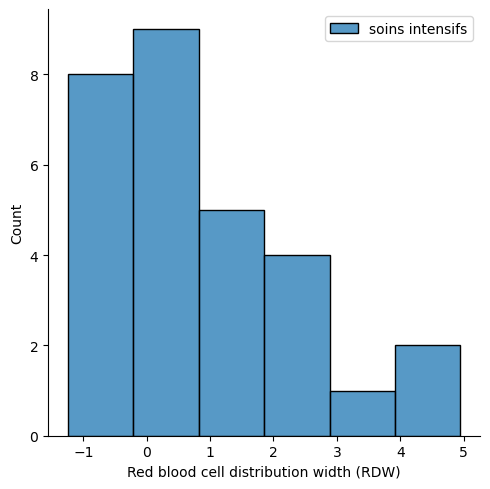

In [37]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.displot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [38]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [39]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [40]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize = True)

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\1681919767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [41]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize = True)

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_2588\3321199378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

In [42]:
from scipy.stats import ttest_ind

In [43]:
positive_df.shape

(558, 38)

In [44]:
negative_df.shape

(5086, 38)

In [45]:
balanced_ned = negative_df.sample(positive_df.shape[0])

In [46]:
def t_test(col):
    alpha = 0.02
    stat, p =ttest_ind(balanced_ned[col].dropna(), 
                       positive_df[col].dropna())
    if p < alpha:
        return 'H0 rejette'
    else:
        return 0

In [47]:
for col in blood_columns:
    print(f'{col:-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejette
Mean platelet volume ----------------------------- H0 rejette
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejette
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejette
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejette
Red blood cell distribution width (RDW)----------- 0


# pre processing

In [48]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = list(df.columns[(missing_rate<0.9)&(missing_rate>0.88)])
viral_columns = list(df.columns[(missing_rate<0.8)&(missing_rate>0.75)])

key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [49]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

   Parainfluenza 3  Chlamydophila pneumoniae    Adenovirus  Parainfluenza 4  \
0              NaN                       NaN           NaN              NaN   
1     not_detected              not_detected  not_detected     not_detected   
2              NaN                       NaN           NaN              NaN   
3              NaN                       NaN           NaN              NaN   
4     not_detected              not_detected  not_detected     not_detected   

   Coronavirus229E  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis  \
0              NaN              NaN             NaN                  NaN   
1     not_detected     not_detected    not_detected         not_detected   
2              NaN              NaN             NaN                  NaN   
3              NaN              NaN             NaN                  NaN   
4     not_detected     not_detected    not_detected         not_detected   

  Metapneumovirus Parainfluenza 2  
0             NaN             NaN  
1    not_detected    not_detected  
2             NaN             NaN  
3             NaN             NaN  
4    not_detected    not_detected  

[5 rows x 33 columns]

## TrainTest- Nettoyage-Encodage

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
trainset, testset = train_test_split(df, test_size = 0.2,
                                    random_state = 0)

In [52]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [53]:
# encodage
code = {
    'positive':1,
    'negative':0,
    'detected':1,
    'not_detected':0
}

In [54]:
for col in df.select_dtypes('object'):
    df[col] = df[col].map(code)

In [55]:
df.dtypes.value_counts()

float64    31
int64       2
Name: count, dtype: int64

In [56]:
###### fonction encodage
def encodage(df):
    code = {
        'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:, col] = df[col].map(code)
    
    return df
    
def feature_engineering(df):
    
    df['est malade'] = df[viral_columns].sum(axis=1)>=1
    df = df.drop(viral_columns, axis=1)
    return df

In [57]:
def imputation(df):
    
    df = df.dropna(axis = 0)
    return df

In [58]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y  

In [59]:
X_train, y_train = preprocessing(trainset)


SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [60]:
x_test, y_test = preprocessing(testset)


SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


# preprocessing

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False),
                             SelectKBest(f_classif, k=10))


In [62]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1,10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1),label='train score')
    plt.plot(N, val_score.mean(axis=1),label='validation score')

In [63]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

list_of_model = {
    'RandomForest' : RandomForest,
    'AdaBoost' : AdaBoost,
    'SVM': SVM,
    'KNN': KNN}

for name, model in list_of_model.items():
    print(name)
    evaluation(model)

RandomForest


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
hyper_params = {
    'svc__gamma':[1e-3, 1e-4],
    'svc__C':[1, 10, 100, 1000],
    'pipeline__polynomialfeatures__degree':[2,3,4],
    'pipeline__selectkbest__k': range(40, 60)
}

In [ ]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                   n_iter =40)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(x_test)

print(classification_report(y_test, y_pred))


In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

In [ ]:
plt.plot(threshold,precision[:-1], label='precision')
plt.plot(threshold,recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold = 0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, x_test, threshold = -1)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)